# **Introduction**

## **Problem Statement**
HDBs play an important role in the property market of Singapore. There are many factors influencing the resale prices of HDBs. Both buyers and sellers rely on intuation and outdated references to predict HDB resale prices. This causes a need for a system to predict resale prices to support fair, data-driven housing decisions.

## **Proposed Use Case**
This project looks to use the structured HDB resale price dataset to create a **machine learning-based system** to estimate the resale prices of HDB. 

This model can:

- Allow buyers to check fair pricing on the flats they are interested
- Assist sellers to set competitive and market-acceptable prices.
- Assist property agents to track pricing trends and make informed decisions for clients.

## **Dataset Overview**

The dataset used for this project is from **Kaggle** and it consists of various features.

- Location features: `latitude`, `longitude`, `postal_code`, `address`, `closest_mrt`, `closest_mrt_dist`, `cbd_dist`, `town`

- Flat features: `flat_type`, `floor_area_sqm`, `flat_model`, `storey_range`, `block`, `street_name`, `month`, `lease_commencement_date`, `years_remaining`

**Target Variable:** `resale_price`

These features help to understand what drives HDB resale prices.

## **Project Objective**

The objective of this project is to train regression algorithms to predict resale_price based on the important features from the dataset. 

**Workflow**

- Data Cleaning & Exploratory Data Analysis (EDA)
- Feature Engineering/Feature Selection
- Baseline and Advanced Model Training
- Model Evaluation using performance metrics such as RMSE, MAE, R2 Score & MSE
- Cross Validation & Hyperparameter Tuning
- Learning Curve Analysis
- Best Model Analysis
- SHAP Analysis

Overall, this project sets out to use use machine learning for real world housing price prediction which is both practical and accurate.



In [1]:
# Importing the required modules for setup and data visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df = pd.read_csv('hdb_resale_price.csv')

# Displaying the first few rows of the dataset to understand its structure
df.head()

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
0,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-05,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,01 TO 05,68.0,Improved,1979,383000.0,66
1,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-07,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,380000.0,66
2,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,04 TO 06,68.0,Improved,1979,378000.0,66
3,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-08,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,388000.0,66
4,1.303671,103.864479,190001.0,1 BEACH RD,Nicoll Highway MRT Station,441.785021,2715.822202,2012-11,KALLANG/WHAMPOA,3 ROOM,1,BEACH RD,10 TO 12,68.0,Improved,1979,387000.0,66


## **Data Exploration and Pre-processing of Data**

In this sections tasks such as data exploration, pre-processing, feature engineering/feature selection were done.

In [3]:
# The number of rows and columns in the dataset
df.shape

(52203, 18)

In [4]:
# Checking values negative or equal to 0 in numerical columns
(df.select_dtypes(include='number') <= 0).sum()

latitude               0
longitude              0
postal_code            0
closest_mrt_dist       0
cbd_dist               0
floor_area_sqm         0
lease_commence_date    0
resale_price           0
years_remaining        0
dtype: int64

In [5]:
# Provide a brief overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52203 entries, 0 to 52202
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             52199 non-null  float64
 1   longitude            52199 non-null  float64
 2   postal_code          52196 non-null  float64
 3   address              52203 non-null  object 
 4   closest_mrt          52199 non-null  object 
 5   closest_mrt_dist     52199 non-null  float64
 6   cbd_dist             52199 non-null  float64
 7   month                52203 non-null  object 
 8   town                 52203 non-null  object 
 9   flat_type            52203 non-null  object 
 10  block                52203 non-null  object 
 11  street_name          52203 non-null  object 
 12  storey_range         52203 non-null  object 
 13  floor_area_sqm       52203 non-null  float64
 14  flat_model           52203 non-null  object 
 15  lease_commence_date  52203 non-null 

From df.info() we can see some columns have lesser non-null values than other columns, which indicate the possibility of missing or null values.

In [6]:
# Check for null and missing values in the column, sort it in descending order
df.isnull().sum().sort_values(ascending=False)

postal_code            7
latitude               4
closest_mrt            4
closest_mrt_dist       4
cbd_dist               4
longitude              4
storey_range           0
resale_price           0
lease_commence_date    0
flat_model             0
floor_area_sqm         0
flat_type              0
street_name            0
block                  0
town                   0
month                  0
address                0
years_remaining        0
dtype: int64

From df.isnull().sum(), we can see that latitude, longtitude, postal_code, closet_mrt, closest_mrt_dist, cbd_dist all have missing or null values.

In [7]:
# Calculate the percentage of missing values in each column
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

# Create a DataFrame to summarize the missing values and their percentages
missing_summary = pd.DataFrame({
    'Missing Values': missing,
    'Percentage (%)': missing_percent.round(4)
})

# Filter out columns with missing values and sort by percentage
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
print(missing_summary.sort_values('Percentage (%)', ascending=False))

                  Missing Values  Percentage (%)
postal_code                    7          0.0134
latitude                       4          0.0077
longitude                      4          0.0077
closest_mrt                    4          0.0077
closest_mrt_dist               4          0.0077
cbd_dist                       4          0.0077


There are a total of 52203 rows of data. The postal code column has 7 missing values while the columns latitude, longtitude, closest_mrt, closest_mrt_dist and cbd_dist have 4 missing values. The percentage of missing values in postal code is 0.0134% while the others are 0.0077%. This missing values make up very little percent of the data. Therefore, instead of imputing, removing them would ensure better downstream work and better integrity of data which might lead to more accurate predictions.

In [8]:
# Drop the missing values from the dataset (postal_code, latitude, closest_mrt, closest_mrt_dist, cbd_dist, longtitude)
df = df.dropna()


In [9]:
# Check if missing values have been removed
df.isnull().sum()

latitude               0
longitude              0
postal_code            0
address                0
closest_mrt            0
closest_mrt_dist       0
cbd_dist               0
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
years_remaining        0
dtype: int64

In [10]:
# Check the number of unique values in each column (important for categorical data)
df.nunique()

latitude               8021
longitude              8002
postal_code            8021
address                8021
closest_mrt              96
closest_mrt_dist       8021
cbd_dist               8021
month                    34
town                     26
flat_type                 7
block                  2046
street_name             514
storey_range             22
floor_area_sqm          163
flat_model               17
lease_commence_date      47
resale_price           2067
years_remaining          47
dtype: int64

In [11]:
# To check for duplicate rows in the dataset
df[df.duplicated()]

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
47,1.275499,103.841398,80001.0,1 EVERTON PK,Outram Park MRT Station,513.706328,1379.225999,2014-04,BUKIT MERAH,5 ROOM,1,EVERTON PK,10 TO 12,138.0,Improved,1980,751888.0,65
168,1.307871,103.883192,390001.0,1 PINE CL,Mountbatten MRT Station,198.762784,4490.042501,2014-05,GEYLANG,4 ROOM,1,PINE CL,07 TO 09,95.0,Model A,2000,590000.0,85
275,1.440806,103.777319,730010.0,10 MARSILING DR,Marsiling MRT Station,984.626290,19294.204220,2014-04,WOODLANDS,5 ROOM,10,MARSILING DR,10 TO 12,126.0,Standard,1976,418000.0,61
523,1.397847,103.906436,822101.0,101B PUNGGOL FIELD,Sengkang MRT Station,1395.766053,14103.937545,2014-02,PUNGGOL,5 ROOM,101B,PUNGGOL FIELD,16 TO 18,110.0,Improved,2002,540888.0,87
525,1.397847,103.906436,822101.0,101B PUNGGOL FIELD,Sengkang MRT Station,1395.766053,14103.937545,2014-04,PUNGGOL,5 ROOM,101B,PUNGGOL FIELD,04 TO 06,110.0,Improved,2002,498000.0,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50602,1.339116,103.686610,640902.0,902 JURONG WEST ST 91,Pioneer MRT Station,1204.048391,19350.334782,2014-04,JURONG WEST,4 ROOM,902,JURONG WEST ST 91,01 TO 03,104.0,Model A,1988,400000.0,73
50683,1.341175,103.686452,640909.0,909 JURONG WEST ST 91,Pioneer MRT Station,1273.061437,19441.077379,2014-05,JURONG WEST,4 ROOM,909,JURONG WEST ST 91,04 TO 06,104.0,Model A,1989,380000.0,74
50850,1.341455,103.687970,640914.0,914 JURONG WEST ST 91,Pioneer MRT Station,1125.181358,19292.081199,2012-05,JURONG WEST,3 ROOM,914,JURONG WEST ST 91,01 TO 05,73.0,Model A,1988,312000.0,75
51896,1.321581,103.854151,320098.0,98 WHAMPOA DR,Boon Keng MRT Station,864.461669,4277.836343,2014-03,KALLANG/WHAMPOA,3 ROOM,98,WHAMPOA DR,01 TO 03,65.0,Improved,1974,318000.0,59


From running the code df[df.duplicated()] we are able to identify 248 rows of duplicate values across 18 columns. Keeping these duplicates in the dataset can cause overfitting or data leakage which will affect accuray of the models. Therefore, to ensure data integrity, the first occurance of each duplicated row will be retained and the rest will be removed.

In [12]:
# Removes all duplicate rows from the dataset, keeping the first occurrence
df = df.drop_duplicates()

In [13]:
# Check if duplicate rows have been removed
df[df.duplicated()]

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining


In [14]:
# Check the number of rows and columns after cleaning the dataset
df.shape

(51948, 18)

In [15]:
# Displaying the statistical summary of the dataset
df.describe()

,latitude,longitude,postal_code,closest_mrt_dist,cbd_dist,floor_area_sqm,lease_commence_date,resale_price,years_remaining
count,51948.000000,51948.000000,51948.000000,51948.000000,51948.000000,51948.000000,51948.000000,5.194800e+04,51948.000000
mean,1.364829,103.837082,544380.251887,755.340744,12411.766015,96.233056,1989.516016,4.614087e+05,75.595403
std,0.043316,0.073685,183566.405985,424.176340,4528.778373,24.989580,10.136514,1.225921e+05,10.180463
min,1.270380,103.685228,50004.000000,31.759821,592.121638,31.000000,1966.000000,1.950000e+05,52.000000
25%,1.335408,103.773674,470101.000000,446.291386,9478.343681,73.000000,1983.000000,3.700000e+05,68.000000
50%,1.358876,103.840714,560112.000000,681.355678,13182.929907,95.000000,1988.000000,4.400000e+05,74.000000
75%,1.389901,103.896538,680014.250000,965.101647,16082.019965,111.000000,1999.000000,5.250000e+05,85.000000
max,1.457071,103.987804,825195.000000,3496.402761,20225.103698,266.000000,2012.000000,1.088888e+06,98.000000


## **Visualisations**

In this section, visualisations have been done to understand and gather insights about the dataset.

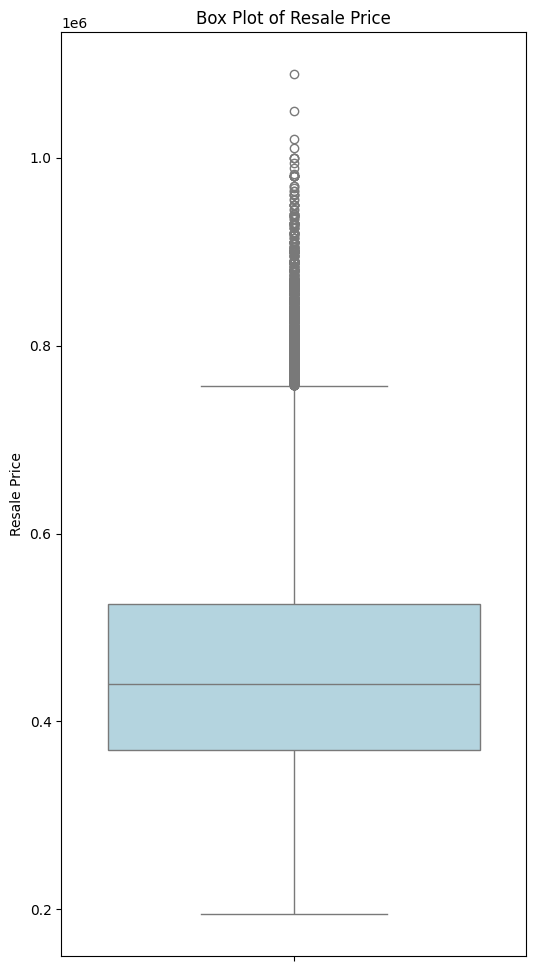

In [16]:
# Visualise the distribution of resale prices using a box plot
plt.figure(figsize=(6, 12))
sns.boxplot(y=df['resale_price'], color='lightblue')
plt.title('Box Plot of Resale Price')
plt.ylabel('Resale Price')
plt.show()


The box plot helps to visulise the distribution of resale prices and from the box plot we can see there are outliers in the resale price column. The values are represented by the circles above the upper whisker. These points suggest that there are resale prices that are way above the typical range highlighting transactions with unusually high values.


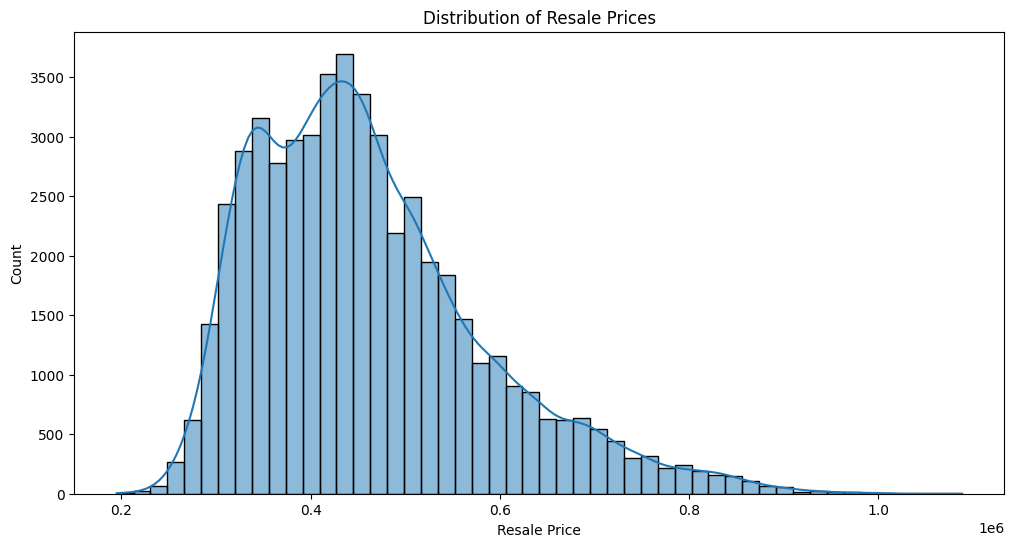

In [17]:
# Visualise the distribution of resale prices using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['resale_price'], bins=50, kde=True)
plt.title('Distribution of Resale Prices')
plt.xlabel('Resale Price')
plt.show()


This is a histogram plot to further visualise the distribution of HDB resale price. This histogram shows us that the resale prices are not normally distributed. The distribution is slightly right-skewed where majority of the resale prices fall within the 300,000 to 500,000 range. 


In [18]:
# Calculate the skewness of the resale price distribution
print(f"Skewness: {df['resale_price'].skew():.4f}")

Skewness: 0.9484


The skew of the column confirms that resale price is right skewed as it has a skewness of 0.9484.

In [19]:
# Calculate the 95th percentile for 'resale_price'
price_percentile_95 = df['resale_price'].quantile(0.95)

# Filter out the top 5% resale price outliers
df = df[df['resale_price'] <= price_percentile_95]

To deal with the outliers in the resale price column, 95th percentile filter was used. This removed top 5% of the resale prices. By filtering out these outliers, during model training the model can focus on the core distribution of data, which allows it to generalize better. This will help to reduce noise and avoid overfitting of the models.

In [20]:
df.sample(5)

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining
16094,1.323079,103.737791,600025.0,25 TEBAN GDNS RD,Jurong East MRT Station,1229.534581,13387.334570,2014-03,JURONG EAST,4 ROOM,25,TEBAN GDNS RD,01 TO 03,99.0,Model A,1993,360000.0,78
25662,1.362933,103.752194,650384.0,384 BT BATOK WEST AVE 5,Bukit Gombak MRT Station,473.179126,14133.977744,2012-10,BUKIT BATOK,4 ROOM,384,BT BATOK WEST AVE 5,25 TO 27,92.0,Model A,2005,540000.0,92
32921,1.387033,103.768121,670506.0,506 JELAPANG RD,Bukit Panjang MRT Station,1193.958938,14765.566949,2013-12,BUKIT PANJANG,5 ROOM,506,JELAPANG RD,13 TO 15,120.0,Improved,1998,505000.0,84
24487,1.364068,103.851612,560353.0,353 ANG MO KIO ST 32,Ang Mo Kio MRT Station,687.610999,8964.159515,2012-05,ANG MO KIO,5 ROOM,353,ANG MO KIO ST 32,11 TO 15,110.0,Improved,2001,700000.0,88
38324,1.304547,103.768774,120610.0,610 CLEMENTI WEST ST 1,Clementi MRT Station,1234.813291,9488.469751,2013-05,CLEMENTI,3 ROOM,610,CLEMENTI WEST ST 1,04 TO 06,74.0,Model A,1983,357000.0,69


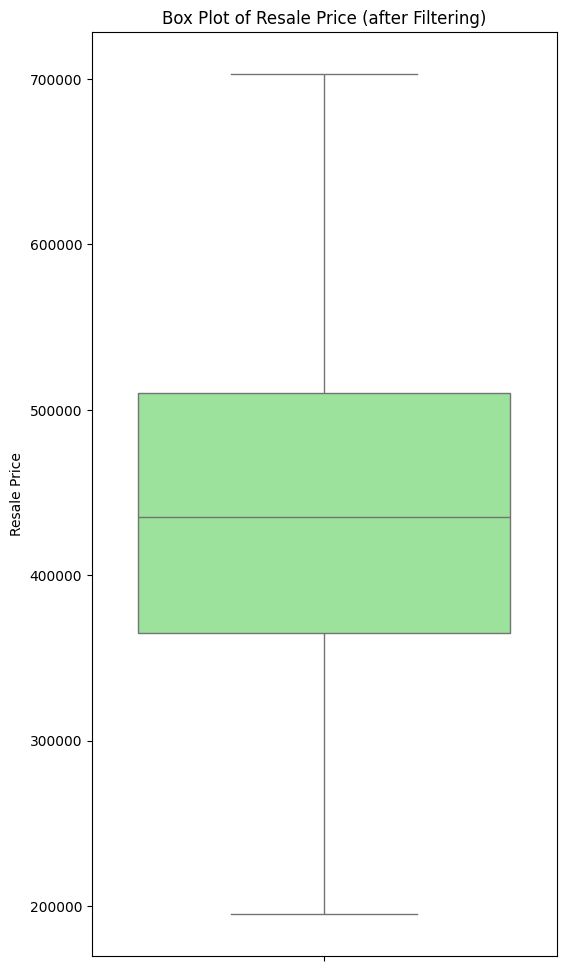

In [21]:
# Visualise the distribution of resale prices after filtering out the top 5% outliers
plt.figure(figsize=(6, 12))
sns.boxplot(y=df['resale_price'], color='lightgreen')
plt.title('Box Plot of Resale Price (after Filtering)')
plt.ylabel('Resale Price')
plt.show()


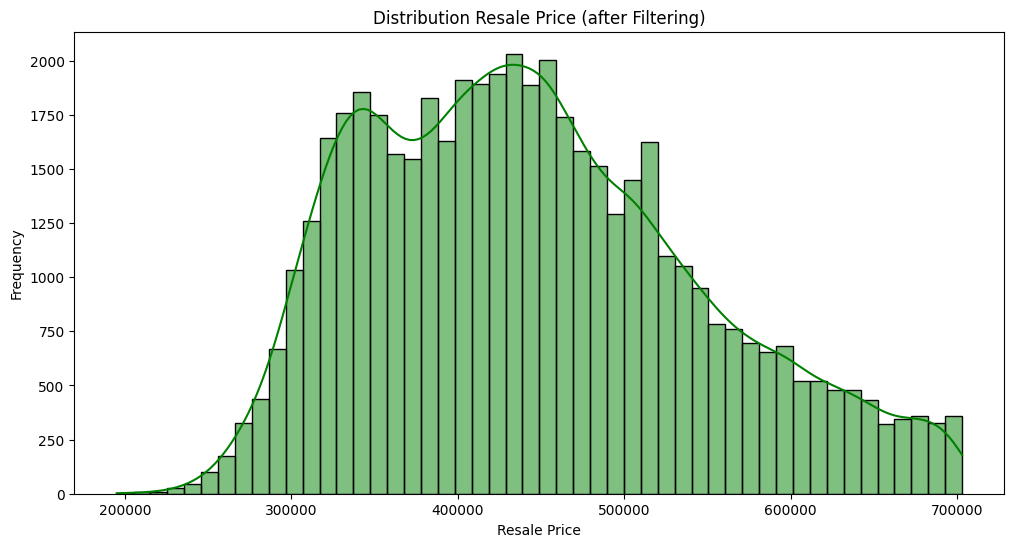

In [22]:
# Visualise the distribution of resale prices after filtering out the top 5% outliers using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['resale_price'], bins=50, kde=True, color='green')
plt.title('Distribution Resale Price (after Filtering)')
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Calculate the skewness of the resale price distribution after filtering out the top 5% outliers
print(f"Skewness (after filtering): {df['resale_price'].skew():.4f}")

Skewness (after filtering): 0.4644


The box plot and histogram were re-plotted to visualise the resale price column after filtering. The box plot did not show extreme outliers and distribution of the histogram looks better. The skewness of the column reduced to 0.4644 which shows that the data became more normally distributed. Overall, this will help the model learn the patterns more effectively, reduces the influence of extreme values and improves generalisation of the model.

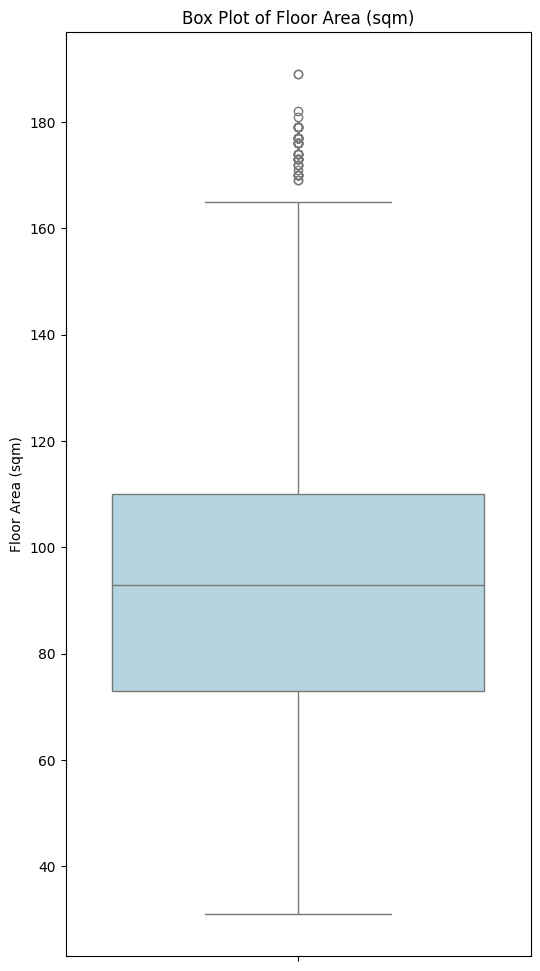

In [24]:
# Visualise the distribution of floor area using a box plot
plt.figure(figsize=(6, 12))
sns.boxplot(y=df['floor_area_sqm'], color='lightblue')
plt.title('Box Plot of Floor Area (sqm)')
plt.ylabel('Floor Area (sqm)')
plt.show()

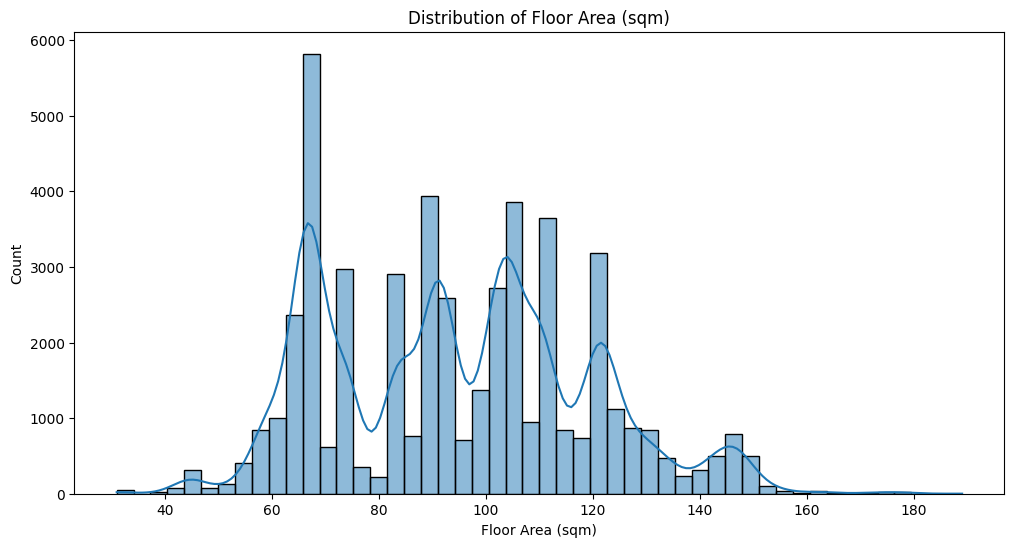

In [25]:
# Visualise the distribution of floor area using a histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['floor_area_sqm'], bins=50, kde=True)
plt.title('Distribution of Floor Area (sqm)')
plt.xlabel('Floor Area (sqm)')
plt.show()


In [26]:
# Calculate the skewness of the floor area distribution
print(f"Skewness: {df['floor_area_sqm'].skew():.4f}")

Skewness: 0.2497



From the box plot for floor area we can observe most HDB flats fall between approximately 70 sqm to 130 sqm. The median is around 90 sqm. There are outliers present above the upper whisker which indicate the larger flats.

 The histogram shows a multi-modal distribution with peaks at certain floor area. This likely indicate the common HDB flat types. The skewness of 0.2497 suggests a slight right skew in distribution, but its still fairly balanced, so no further transformation needs to be done.

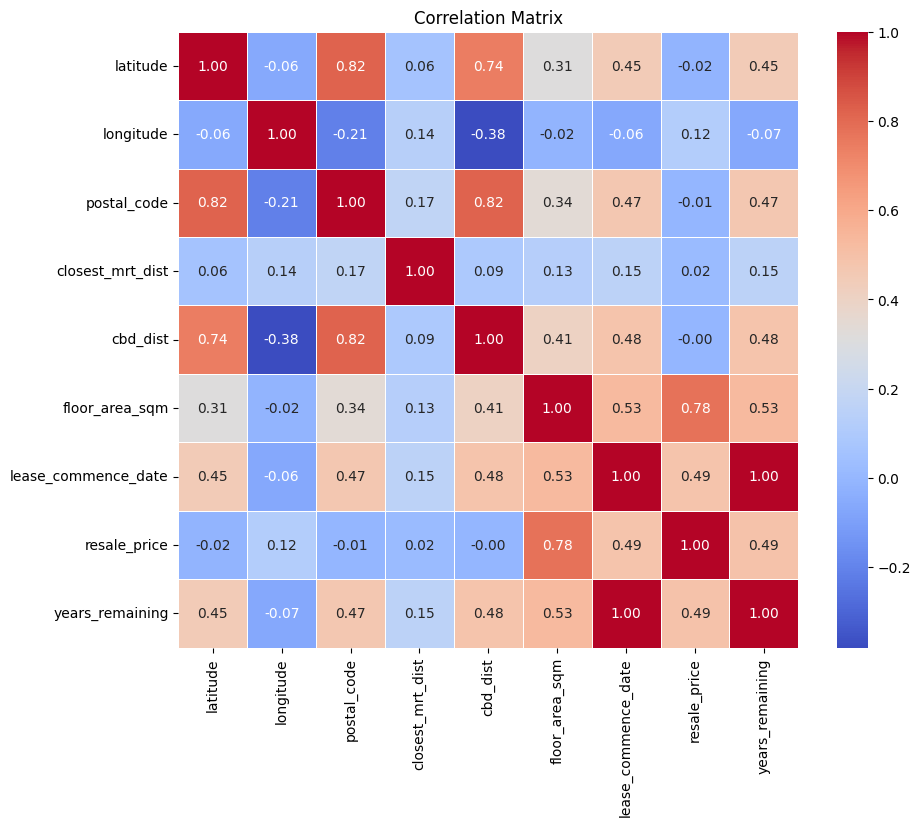

                Column  Correlation
0         resale_price     1.000000
1       floor_area_sqm     0.775973
2      years_remaining     0.491118
3  lease_commence_date     0.485867
4            longitude     0.116360
5     closest_mrt_dist     0.015042
6             cbd_dist    -0.003944
7          postal_code    -0.007958
8             latitude    -0.015019


In [27]:
correlation = df.corr(numeric_only=True)


# Plot correlation matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Extract correlation values for resale_price
resale_price_correlation = correlation['resale_price'].sort_values(ascending=False)

# Create a DataFrame to display the correlation values
correlation_table = pd.DataFrame({
    'Column': resale_price_correlation.index,
    'Correlation': resale_price_correlation.values
})

# Print correlation values sorted by strength
print(correlation_table)

This correlation matrix is used to determine the relationship between numerical features and resale price. From the table we can observe that floor_area_sqm has the strongest positive correlation with resale price at 0.78. This gives us an insight that bigger flats have higher resale value. The other features such as years_remaining, lease_commencement_date, and longitude have moderate positive correlations. This indicates these columns have an influence on resale price and might be useful for model training.

In contrast, the features such as closest_mrt_dist, cbd_dist, postal_code and latitude have very weak correlation with resale price. Both cbd_dist and postal_code have a correlation of -0.0039 and -0.0079 respectively. However, negative correlation does not mean the columns are not useful and further analysis has to be done to determine the importance of these columns.

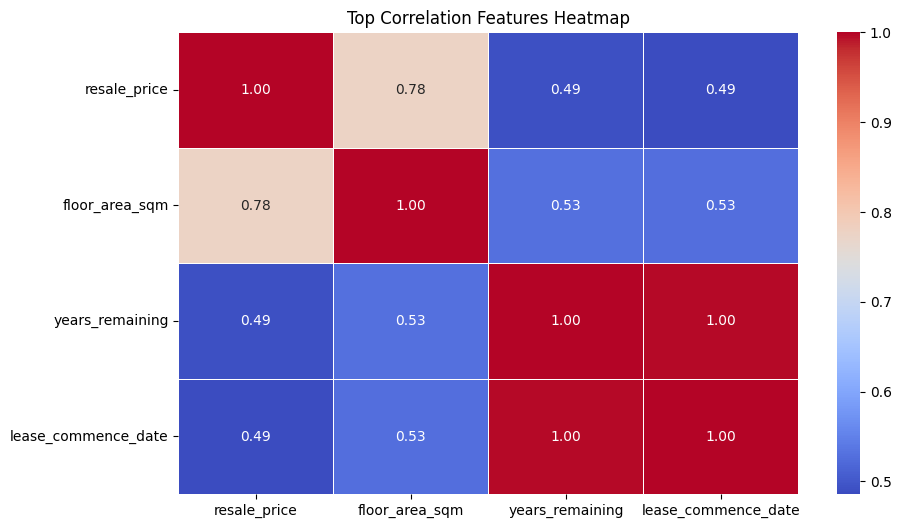

In [28]:
# Select features with correlation greater than 0.3 
top_correlation_features = resale_price_correlation[resale_price_correlation.abs() > 0.3].index

# Plot heatmap for top correlation features
plt.figure(figsize=(10, 6))
sns.heatmap(df[top_correlation_features].corr(numeric_only = True), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Top Correlation Features Heatmap')
plt.show()

This heatmap confirms columns above 0.3 correlated with resale price. In addition, it also reveals an interesting insight that lease commencement date and years remaining are also highy correlated at 1.00. Both years_remaining and lease_commencement date have the same correlation with resale price. This suggests the possibility of multicollinearity.

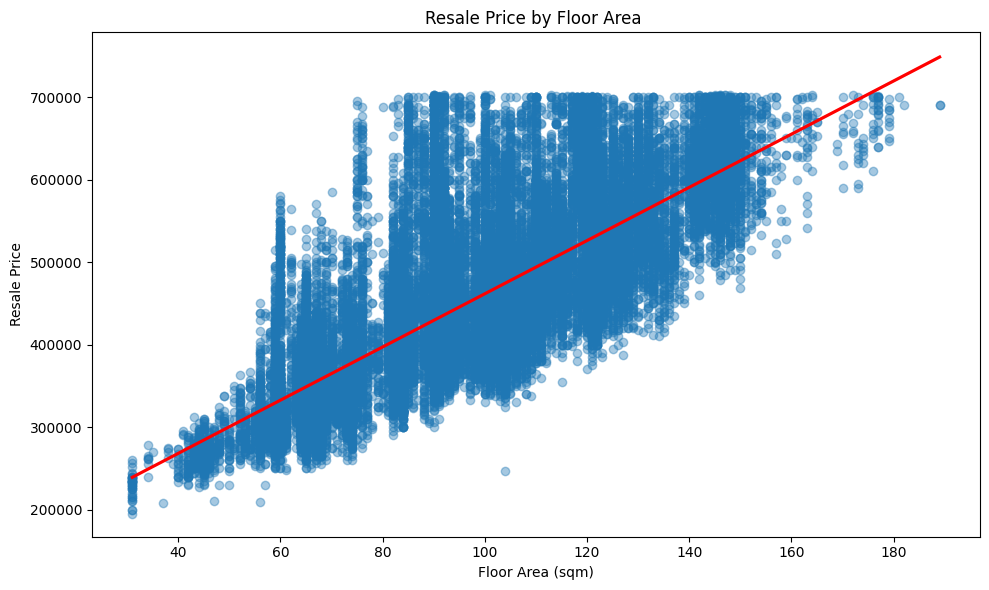

In [29]:
# Scatter plot to visualize the relationship between floor area and resale price
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='floor_area_sqm',
    y='resale_price',
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'red'}
)
plt.title('Resale Price by Floor Area ')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Resale Price')
plt.tight_layout()
plt.show()

To further understand the relationship between resale price and floor area, a scatter plot was used. From the scatter plot we can observe a postive trend where larger flats have a higher resale price. However it is not a linear trend as the resale price seems to plateau after 120 sqm. This suggests beyond floor area there are also other features that influence resale price.

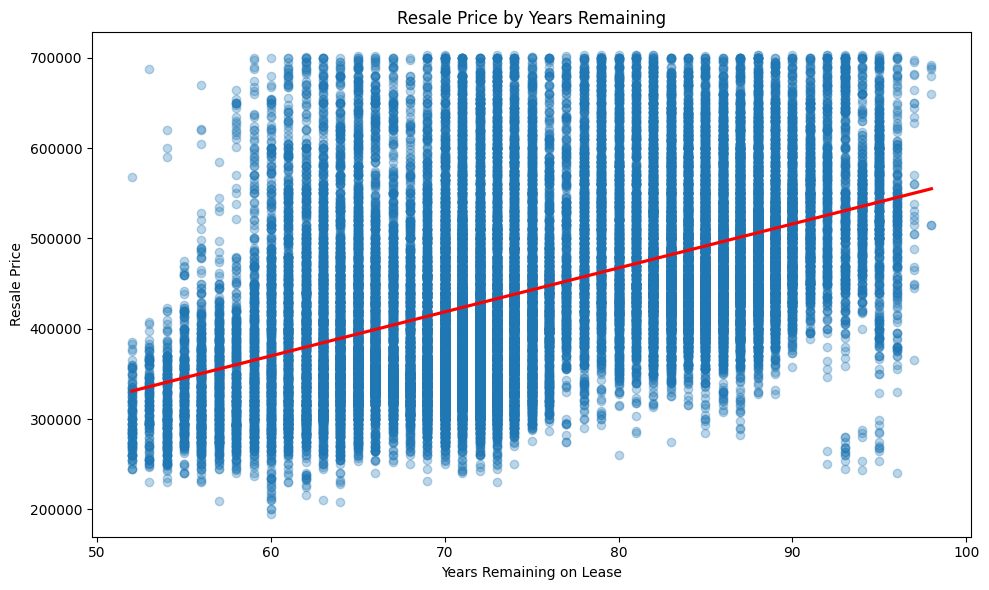

In [30]:
plt.figure(figsize=(10, 6))
sns.regplot(x='years_remaining', y='resale_price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("Resale Price by Years Remaining")
plt.xlabel("Years Remaining on Lease")
plt.ylabel("Resale Price")
plt.tight_layout()
plt.show()


The scatter plot for resale price by years remaining shows a positive trend where flats with higher years remaining in lease have a higher resale price. Flats with longer leases approximately above 85 years have a higher resale price, and as years remaining on lease decrease the resale prices seem to drop. This trend shows that years_remaining is an influential factor in predicting resale price.

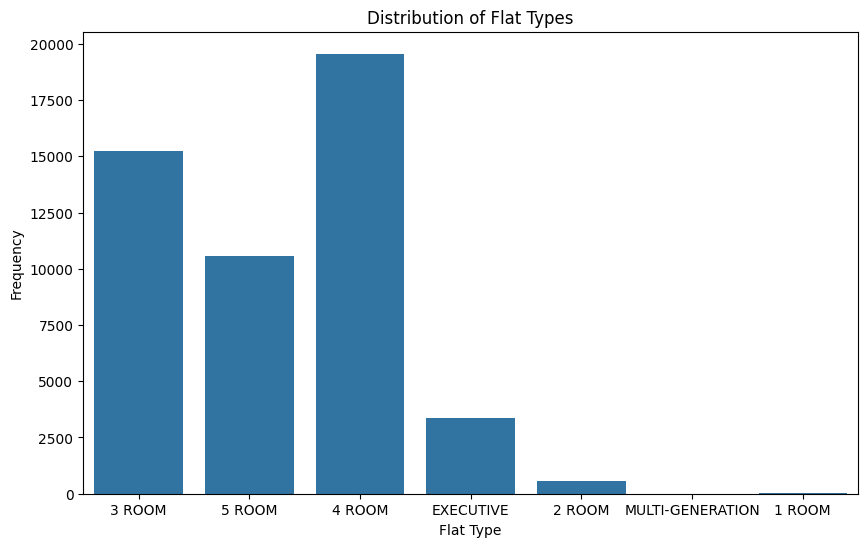

In [31]:
# Visualise the distribution of flat types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='flat_type')
plt.title('Distribution of Flat Types')
plt.xlabel('Flat Type')
plt.ylabel('Frequency')
plt.show()

 This bar chart shows the distribution of flat types. 


- It can be observed 4 Room Flats have the highest occurance with nearly 20,000 entrires. 

- 3 Room Flats have the second highest occurance with 15,000 entries followed by 5 Room, Exectutive and 2 Room. 

- Both Multi-Generation and 1 Room Flats have the lowest occurances and are very rare. 


This distribution highlights mid sized flats dominate the data, this might cause the predicitions of the model to be biased to these flat types. The accuracy of the model in predicting Multi-Generation/1 Room Flat might potentially be affected.

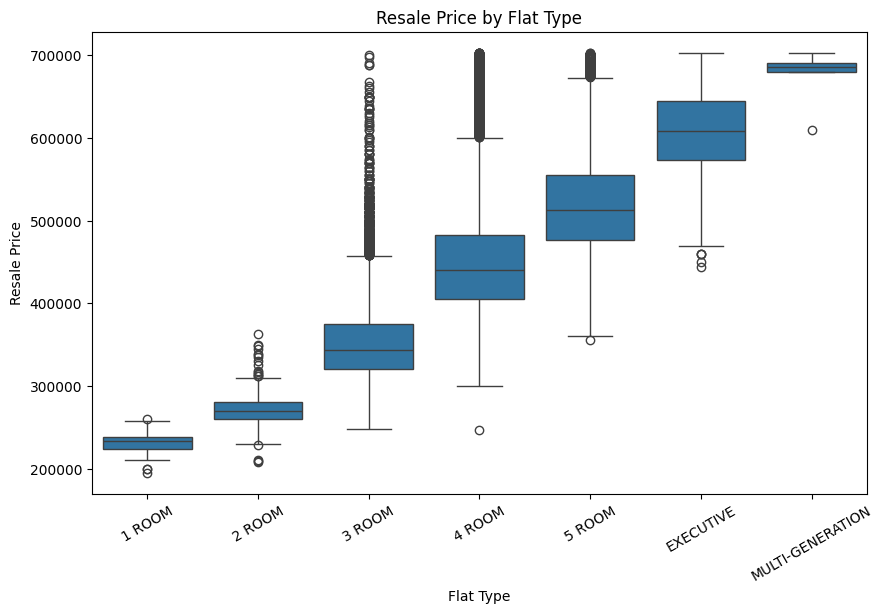

In [32]:
#Create an order
order = ['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', 'MULTI-GENERATION']

# Box plot to visualize resale prices by flat type
plt.figure(figsize=(10, 6))
sns.boxplot(x='flat_type', y='resale_price', data=df, order=order)
plt.title('Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Resale Price')
plt.xticks(rotation=30)
plt.show()

This box plot shows the relationship between flat type and resale price. The trend we can observe is that as flat type increases, the median resale price also increases. For example, the median price of a 5 Room Flat is around 500,000 which is greater than the median price of a 2 Room Flat which is around 250,000. This shows that in categorical columns flat type might be an influential feature.

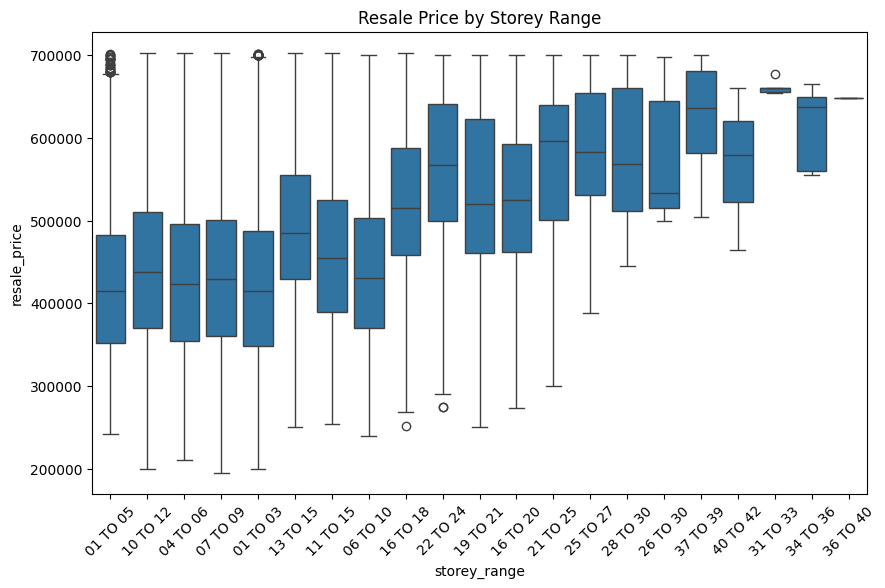

In [33]:
# Visualise resale prices by storey range
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='storey_range', y='resale_price')
plt.xticks(rotation=45)
plt.title('Resale Price by Storey Range')
plt.show()

This box plot shows as storey range increases, the median resale price generally increases. The flats in 01 TO 05 floors have a resale price clustered around 350,000 to 500,000 while as the storey ranges increase the median resale price also increases, for example, flats above 30 have a median resale price exceedsing 600,000. This insight shows storey ranges play an influential role in predicting resale prices.

From this box plot it can also be observed there are overlapping storey ranges which needs to be addressed.


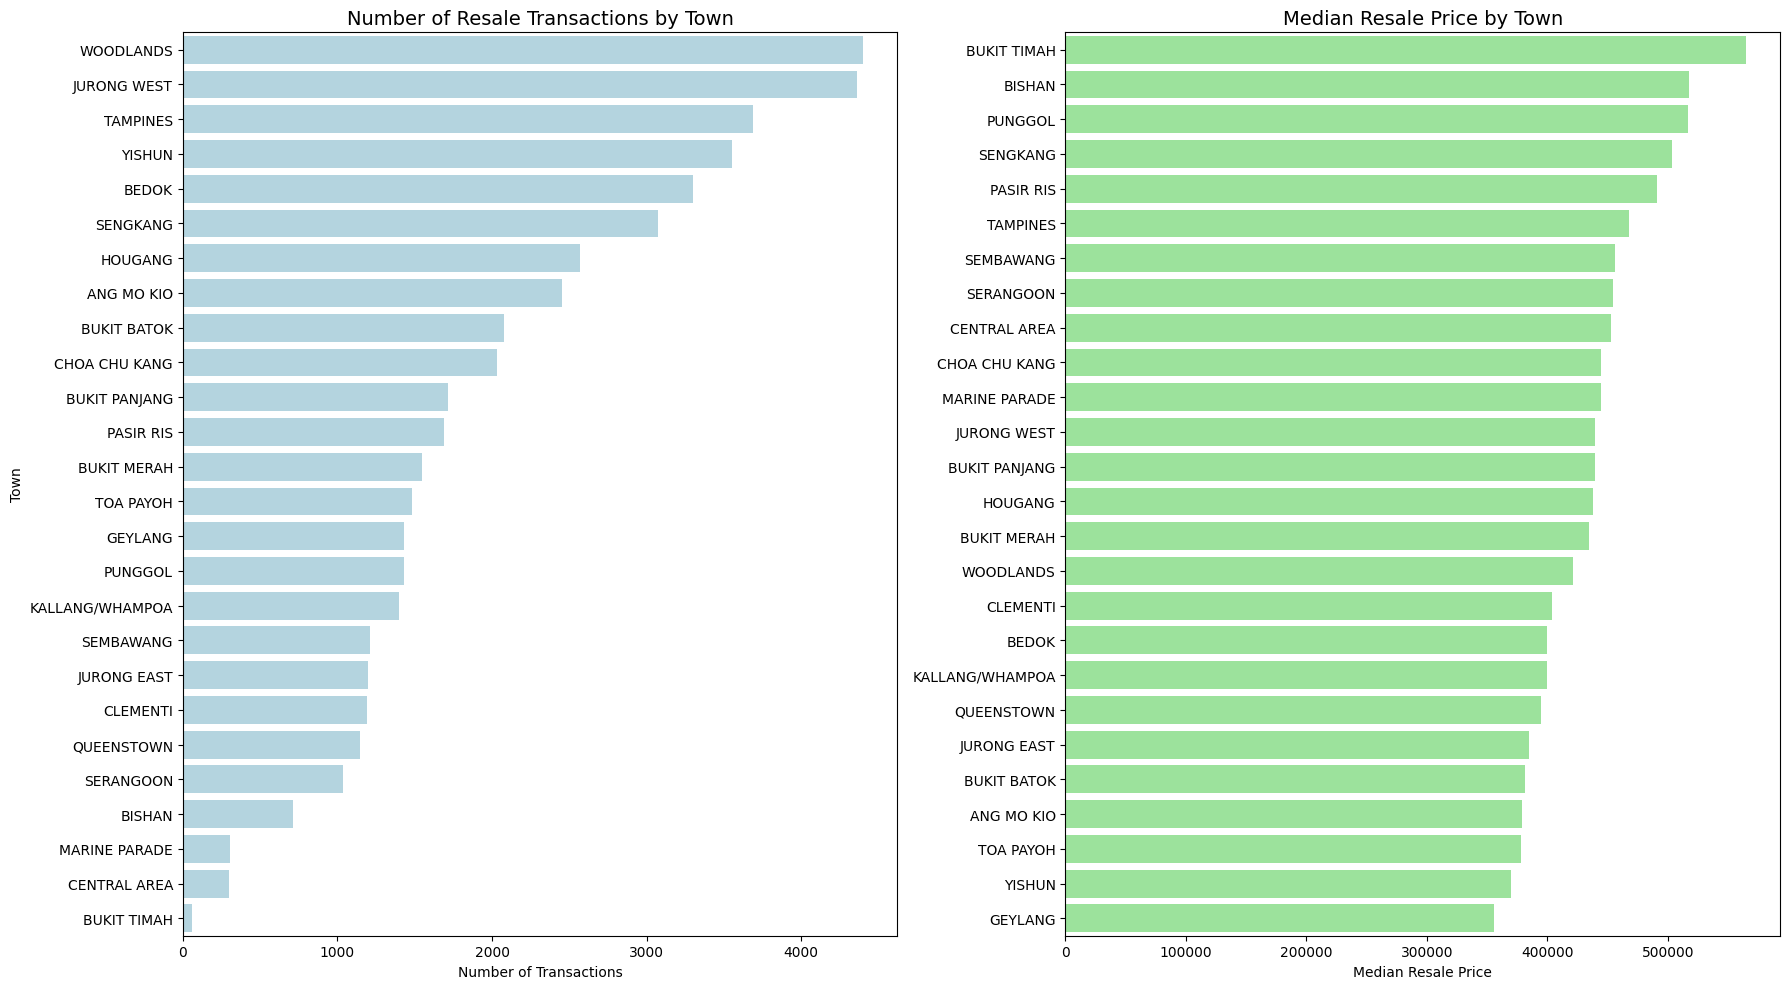

In [34]:
# Group by town and calculate the median resale price
median_price_by_town = df.groupby('town')['resale_price'].median().sort_values(ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# Count plot for number of resale transactions by town
sns.countplot(
    y='town',
    data=df,
    order=df['town'].value_counts().index,
    color='lightblue',
    ax=axes[0]
)
axes[0].set_title('Number of Resale Transactions by Town', fontsize=14, color='black')
axes[0].set_xlabel('Number of Transactions', color='black')
axes[0].set_ylabel('Town', color='black')

# Bar plot for median resale price by town
sns.barplot(
    x=median_price_by_town.values,
    y=median_price_by_town.index,
    color='lightgreen',
    ax=axes[1]
)
axes[1].set_title('Median Resale Price by Town', fontsize=14, color='black')
axes[1].set_xlabel('Median Resale Price', color='black')
axes[1].set_ylabel('', color='black')


plt.tight_layout()
plt.show()

There are two bar charts one for number of transactions by town and the other is median resale price by town. This provides a interesting insight. The towns with high resale transactions such as Woodlands, Jurong West and Tampines have lower median resale prices while towns with low resale transactions such as Bukit Timah, Bishan and Punngol have high median resale prices. There is an inverse relationship which shows market segments, where affordable towns have more transactions and premium towns see lesser transactions. 

## **Feature Engineering**/**Feature Selection**

In this section new columns were engineered, and existing columns were transformed to improve the predictive performance of the model. Addtionally, feature selection was done using feature importance scores where low importance features and high-cardinality features were dropped.

In [35]:
# Convert 'month' column to datetime format and extract year and month
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')

# Extract year and month from the 'month' column, and create new columns named  'transaction_year' and 'transaction_month'
df['transaction_year'] = df['month'].dt.year
df['transaction_month'] = df['month'].dt.month


The column month was not a good representative for flat transactions. It had both the month and year. Therefore, month was converted to datetime to extract the transaction year and month. These two new columns were better representatives of the transaction.

In [36]:
df.sample(5)

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,transaction_year,transaction_month
6206,1.315054,103.870304,380014.0,14 UPP BOON KENG RD,Kallang MRT Station,412.240671,4127.427459,2014-11-01,KALLANG/WHAMPOA,4 ROOM,14,UPP BOON KENG RD,04 TO 06,101.0,Model A,1999,558750.0,84,2014,11
43133,1.342266,103.704309,643686.0,686C JURONG WEST CTRL 1,Boon Lay MRT Station,449.852966,17622.485607,2014-01-01,JURONG WEST,5 ROOM,686C,JURONG WEST CTRL 1,13 TO 15,111.0,Premium Apartment,2000,571000.0,85,2014,1
45929,1.376955,103.935942,510742.0,742 PASIR RIS ST 71,Pasir Ris MRT Station,1545.550620,14023.758440,2013-07-01,PASIR RIS,4 ROOM,742,PASIR RIS ST 71,04 TO 06,104.0,Model A,1996,436000.0,82,2013,7
30308,1.350211,103.720032,640458.0,458 JURONG WEST ST 41,Lakeside MRT Station,665.963155,16390.565246,2013-12-01,JURONG WEST,4 ROOM,458,JURONG WEST ST 41,04 TO 06,91.0,New Generation,1984,400000.0,70,2013,12
40253,1.420069,103.839133,760637.0,637 YISHUN ST 61,Khatib MRT Station,746.399551,15216.757485,2014-12-01,YISHUN,4 ROOM,637,YISHUN ST 61,10 TO 12,85.0,Simplified,1987,340000.0,72,2014,12


In [37]:
# Function to bin storey ranges into new categories
def bin_storey_numeric(val):
    try:
        low = int(val.split(' TO ')[0])
        if low <= 5:
            return '01 TO 05'
        elif low <= 10:
            return '06 TO 10'
        elif low <= 15:
            return '11 TO 15'
        elif low <= 20:
            return '16 TO 20'
        elif low <= 25:
            return '21 TO 25'
        elif low <= 30:
            return '26 TO 30'
        elif low <= 35:
            return '31 TO 35'
        else:
            return '36 TO 40'
    except:
        return 'Unknown'

# Apply binning and create a new column 'storey_range_binned'
df['storey_range_binned'] = df['storey_range'].apply(bin_storey_numeric)

It was observed from the storey range box plot that some floors were repeated. For example "11 TO 15" and "13 TO 15". This was misleading, so the storey range was binned properly to ensure the storey ranges were unique and a new column called storey_range_binned was created.

In [38]:
df.sample(5)

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,month,town,flat_type,...,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,transaction_year,transaction_month,storey_range_binned
38068,1.304236,103.767853,120607.0,607 CLEMENTI WEST ST 1,Clementi MRT Station,1239.028189,9579.145183,2012-06-01,CLEMENTI,3 ROOM,...,CLEMENTI WEST ST 1,04 TO 06,67.0,New Generation,1979,328000.0,66,2012,6,01 TO 05
28540,1.381219,103.739482,680425.0,425 CHOA CHU KANG AVE 4,Choa Chu Kang MRT Station,711.296603,16516.898950,2012-03-01,CHOA CHU KANG,4 ROOM,...,CHOA CHU KANG AVE 4,11 TO 15,104.0,Model A,1992,430000.0,79,2012,3,11 TO 15
36871,1.378433,103.888023,530571.0,571 HOUGANG ST 51,Buangkok MRT Station,750.147527,11316.311903,2014-01-01,HOUGANG,4 ROOM,...,HOUGANG ST 51,16 TO 18,100.0,Model A,1997,445000.0,82,2014,1,16 TO 20
25381,1.334526,103.855915,310037.0,37 LOR 5 TOA PAYOH,Toa Payoh MRT Station,952.153729,5720.599458,2013-04-01,TOA PAYOH,4 ROOM,...,LOR 5 TOA PAYOH,13 TO 15,102.0,Model A,1997,625000.0,83,2013,4,11 TO 15
21929,1.446252,103.819253,750319.0,319 SEMBAWANG CL,Sembawang MRT Station,321.833129,18400.491747,2012-07-01,SEMBAWANG,4 ROOM,...,SEMBAWANG CL,10 TO 12,100.0,Model A,1999,446000.0,86,2012,7,06 TO 10


In [39]:
# Check the data types of the columns in the DataFrame
df.dtypes

latitude                      float64
longitude                     float64
postal_code                   float64
address                        object
closest_mrt                    object
closest_mrt_dist              float64
cbd_dist                      float64
month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
years_remaining                 int64
transaction_year                int32
transaction_month               int32
storey_range_binned            object
dtype: object

In [40]:
# Convert 'postal_code' column to string type after converting it to integer
df['postal_code'] = df['postal_code'].astype(int).astype(str)


Checking the datatype we can see that postal code is of wrong data type. Postal code is not a continous variable as "123456" is not smaller than "125556". Therefore, the column was converted to integer to remove the decimal point and then converted to string type.

In [41]:
df.dtypes

latitude                      float64
longitude                     float64
postal_code                    object
address                        object
closest_mrt                    object
closest_mrt_dist              float64
cbd_dist                      float64
month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
resale_price                  float64
years_remaining                 int64
transaction_year                int32
transaction_month               int32
storey_range_binned            object
dtype: object

In [42]:
# Drop unnecessary columns that are not needed for analysis
df = df.drop(columns=['month', 'storey_range'])

The columns month and storey range are redundant as transaction year and month was extracted from month and the original storey range column is rebinned into storey_range_binned. Therefore both columns were dropped.

In [43]:
df.sample(5)

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,transaction_year,transaction_month,storey_range_binned
35750,1.382495,103.764046,670543,543 JELAPANG RD,Bukit Panjang MRT Station,520.283259,14674.117653,BUKIT PANJANG,EXECUTIVE,543,JELAPANG RD,140.0,Apartment,1999,610000.0,85,2013,7,01 TO 05
47293,1.447512,103.800282,730779,779 WOODLANDS CRES,Admiralty MRT Station,769.620333,19056.371709,WOODLANDS,4 ROOM,779,WOODLANDS CRES,101.0,Model A,1997,420000.0,84,2012,8,06 TO 10
31274,1.450897,103.817082,750475,475 SEMBAWANG DR,Sembawang MRT Station,387.976835,18951.763675,SEMBAWANG,5 ROOM,475,SEMBAWANG DR,110.0,Improved,2000,435000.0,85,2014,7,01 TO 05
13012,1.367715,103.961300,510214,214 PASIR RIS ST 21,Pasir Ris MRT Station,1461.650010,15414.658649,PASIR RIS,4 ROOM,214,PASIR RIS ST 21,108.0,Model A,1993,456000.0,79,2013,2,06 TO 10
42875,1.404679,103.746315,683683,683C CHOA CHU KANG CRES,Yew Tee MRT Station,805.845315,17819.510187,CHOA CHU KANG,4 ROOM,683C,CHOA CHU KANG CRES,90.0,Model A,2002,375000.0,87,2014,10,06 TO 10


In [44]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Create a DataFrame to count unique values in each categorical column
unique_counts = pd.DataFrame({
    'Column': categorical_cols,
    'Unique Values': [df[col].nunique() for col in categorical_cols]
})

# Display as clean table which is sorted 
print(unique_counts.sort_values(by='Unique Values', ascending=False).to_string(index=False))



             Column  Unique Values
        postal_code           7755
            address           7755
              block           2005
        street_name            510
        closest_mrt             96
               town             26
         flat_model             15
storey_range_binned              8
          flat_type              7


In [45]:
# Import necessary libraries for encoding and model training
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Identify categorical columns 
categorical_cols = df.select_dtypes(include='object').columns

# Label encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define feature lists
encoded_cols = [col + '_encoded' for col in categorical_cols]
all_numericals = df.select_dtypes(include=['int', 'float']).drop(columns=['resale_price']).columns.tolist()

# Remove any overlap
numerical_cols = [col for col in all_numericals if col not in encoded_cols]

# Define X and y
X = df[encoded_cols + numerical_cols]
y = df['resale_price']

# Train RandomForestRegressor
rf = RandomForestRegressor(random_state=7)
rf.fit(X, y)

# Get and sort feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

# Display features with importance
print("Features by Importance:")
print(importances_sorted)


Features by Importance:
floor_area_sqm                 0.513561
flat_type_encoded              0.149154
cbd_dist                       0.136052
latitude                       0.030127
lease_commence_date            0.027746
postal_code_encoded            0.025265
closest_mrt_dist               0.019178
longitude                      0.017149
years_remaining                0.015421
transaction_year               0.013985
storey_range_binned_encoded    0.013630
transaction_month              0.009519
street_name_encoded            0.006697
closest_mrt_encoded            0.006188
address_encoded                0.004882
block_encoded                  0.004689
flat_model_encoded             0.003797
town_encoded                   0.002962
dtype: float64


A RandomForestRegressor model was used to determine the importance of each feature in the dataset in predicting resale price. The categorical features were all label-encoded to ensure there were not too many columns to prevent curse of dimensionality. From this the features with importance were revealed. Features such as floor_area_sqm, flat_type, cbd_dist, latitude, lease_commencement_date, postal_code, closest_mrt_dist, longitude, years_remaining, transaction_year and storey_range_binned are important features in predicting resale price. The other features have a feature importance of below 0.01.

In [46]:
# Get all encoded columns to drop
encoded_cols_to_drop = [col for col in df.columns if col.endswith('_encoded')]

# Drop all encoded columns
df = df.drop(columns=encoded_cols_to_drop)

The label-encoded columns were all dropped as they are not needed for model training.

In [47]:
df.sample(5)

,latitude,longitude,postal_code,address,closest_mrt,closest_mrt_dist,cbd_dist,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,years_remaining,transaction_year,transaction_month,storey_range_binned
37606,1.324541,103.921238,460060,60 CHAI CHEE RD,Kembangan MRT Station,1000.640876,9037.812217,BEDOK,3 ROOM,60,CHAI CHEE RD,75.0,Model A,1982,338000.0,68,2013,2,01 TO 05
40945,1.377763,103.843782,560649,649 ANG MO KIO AVE 5,Yio Chu Kang MRT Station,460.194465,10511.715482,ANG MO KIO,3 ROOM,649,ANG MO KIO AVE 5,75.0,New Generation,1980,360000.0,65,2014,11,01 TO 05
11216,1.381946,103.751888,680002,2 TECK WHYE AVE,Choa Chu Kang MRT Station,917.943963,15559.764015,CHOA CHU KANG,3 ROOM,2,TECK WHYE AVE,76.0,Model A,1984,302000.0,69,2014,9,06 TO 10
32196,1.361890,103.957741,529498,498M TAMPINES ST 45,Tampines East MRT Station,718.796327,14711.245697,TAMPINES,4 ROOM,498M,TAMPINES ST 45,106.0,Premium Apartment,1997,495000.0,84,2012,8,01 TO 05
44344,1.390615,103.747156,680707,707 CHOA CHU KANG ST 53,Choa Chu Kang MRT Station,658.192633,16611.120901,CHOA CHU KANG,5 ROOM,707,CHOA CHU KANG ST 53,128.0,Improved,1995,495000.0,80,2014,5,11 TO 15


In [48]:
df.shape

(49361, 19)

In [49]:
# Drop columns with low feature importance and high cardinality
df = df.drop(columns=['transaction_month', 'street_name', 'block', 'address', 'closest_mrt', 'flat_model', 'town', 'lease_commence_date', 'postal_code',])


The above columns were dropped from the dataset. The features with a feature importance of below 0.01 were all dropped as they were not really influential to predict resale price. Furthermore, columns with high cardinality such as postal code even though it had a higher feature importance was dropped to prevent curse of dimensionality. Since lease commencement date and years remaining had a strong correlation, lease commencement date was dropped to prevent multicollinearity. Lease commencement date was chosen to dropped as users will be able to find the years remaining on the flat rather than the day lease commenced.

In [50]:
# Check a sample of the DataFrame after dropping columns
df.sample(5)

,latitude,longitude,closest_mrt_dist,cbd_dist,flat_type,floor_area_sqm,resale_price,years_remaining,transaction_year,storey_range_binned
42622,1.321954,103.869843,210.756060,4776.178416,3 ROOM,65.0,338000.0,61,2012,01 TO 05
39331,1.341847,103.698517,489.506557,18205.896106,EXECUTIVE,130.0,578000.0,88,2012,01 TO 05
6242,1.363948,103.959181,995.847272,14975.443705,4 ROOM,106.0,415000.0,79,2014,06 TO 10
49040,1.352183,103.934927,834.334745,12047.304513,3 ROOM,74.0,345000.0,72,2014,06 TO 10
35983,1.393390,103.742747,688.721883,17173.843257,5 ROOM,121.0,476000.0,82,2012,01 TO 05


In [51]:
# Check the DataFrame info and shape after dropping columns
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 49361 entries, 0 to 52190
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   latitude             49361 non-null  float64
 1   longitude            49361 non-null  float64
 2   closest_mrt_dist     49361 non-null  float64
 3   cbd_dist             49361 non-null  float64
 4   flat_type            49361 non-null  object 
 5   floor_area_sqm       49361 non-null  float64
 6   resale_price         49361 non-null  float64
 7   years_remaining      49361 non-null  int64  
 8   transaction_year     49361 non-null  int32  
 9   storey_range_binned  49361 non-null  object 
dtypes: float64(6), int32(1), int64(1), object(2)
memory usage: 4.0+ MB


(49361, 10)

In [52]:
# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=['flat_type', 'storey_range_binned'], drop_first=True)


The remaining categorical columns were one-hot-encoded for model training.

In [53]:
# Check a sample of DataFrame after one-hot encoding
df.sample(5)

,latitude,longitude,closest_mrt_dist,cbd_dist,floor_area_sqm,resale_price,years_remaining,transaction_year,flat_type_2 ROOM,flat_type_3 ROOM,...,flat_type_5 ROOM,flat_type_EXECUTIVE,flat_type_MULTI-GENERATION,storey_range_binned_06 TO 10,storey_range_binned_11 TO 15,storey_range_binned_16 TO 20,storey_range_binned_21 TO 25,storey_range_binned_26 TO 30,storey_range_binned_31 TO 35,storey_range_binned_36 TO 40
45268,1.426475,103.829916,654.575616,16042.212497,142.0,645000.0,72,2013,False,False,...,False,True,False,True,False,False,False,False,False,False
11496,1.387288,103.893598,491.372635,12455.431161,110.0,502000.0,88,2012,False,False,...,True,False,False,False,False,False,False,False,False,False
43400,1.443920,103.808674,931.073052,18415.241276,90.0,388000.0,89,2014,False,False,...,False,False,False,False,False,True,False,False,False,False
2150,1.338871,103.736219,535.511526,14219.642423,68.0,339500.0,69,2012,False,True,...,False,False,False,True,False,False,False,False,False,False
31643,1.376230,103.736338,1348.665954,16430.511571,116.0,459000.0,85,2013,False,False,...,True,False,False,True,False,False,False,False,False,False


In [54]:
# Check the shape of the DataFrame after dropping columns and one-hot encoding
df.shape

(49361, 21)

In [55]:
# Check the columns of the DataFrame after all transformations before machine learning
print(df.columns.tolist())


['latitude', 'longitude', 'closest_mrt_dist', 'cbd_dist', 'floor_area_sqm', 'resale_price', 'years_remaining', 'transaction_year', 'flat_type_2 ROOM', 'flat_type_3 ROOM', 'flat_type_4 ROOM', 'flat_type_5 ROOM', 'flat_type_EXECUTIVE', 'flat_type_MULTI-GENERATION', 'storey_range_binned_06 TO 10', 'storey_range_binned_11 TO 15', 'storey_range_binned_16 TO 20', 'storey_range_binned_21 TO 25', 'storey_range_binned_26 TO 30', 'storey_range_binned_31 TO 35', 'storey_range_binned_36 TO 40']


## **Model Building & Evaluation of Model**

In this section, various machine learning models such as Linear Models, Robust Regressors, Support Vector Machines and Ensemble Models have been trained and evaluated to compare their performances on a supervised regression problem. 

<strong>Models Trained:</strong>

1. Linear Regression

2. Ridge Regression

3. Lasso Regression

4. ElasticNet

5. HuberRegressor

6. Theil-SenRegressor

7. SupportVectorMachines (SVM)

8. DecisionTreeRegressor

9. GradientBoostingRegressor

10. AdaBoostRegressor

11. HistGradientBoostingRegressor

12. ExtraTreesRegressor

<strong>Evaluation Metrics: </strong>

1. **RMSE (Root Mean Squared Error)**: Measures average magnitude of prediction errors

2. **MAE (Mean Absolute Error)**: Captures the average absolute difference between predicted and actual values

3. **R2 Score**: Indicates how well the model explains variance

4. **MSE (Mean Squared Error)**: Average of squared errors to penalize large errors

<strong>Model Seperation: </strong>

The models were seperated based on whether scaling was needed and robust scaler was applied to the models. 

**Summary:**

The models were compared using their performance metrics and the best 4 will be chosen for further training and evaluation.


In [56]:
# Split the dataset into features (X) and target variable (y)
from sklearn.model_selection import train_test_split
X = df.drop(['resale_price'], axis=1)
y = df['resale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [57]:
# Importing all the models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor

# Initialising Models with scaling
scaling_models = {
    'Ridge': Ridge(),
    'Lasso': Lasso(max_iter=10000, tol=1e-3),
    'ElasticNet': ElasticNet(max_iter=5000),
    'HuberRegressor': HuberRegressor(max_iter=2000),
    'TheilSenRegressor': TheilSenRegressor(random_state=7),
    'SVR': SVR(),
} 

# Initialising Models without scaling
normal_models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=7),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=7),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=7),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state=7),
    'ExtraTreesRegressor': ExtraTreesRegressor(random_state=7)
}


In [58]:
# Importing necessary libraries for model training and evaluation
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

results = []

# Train models with scaling
for name, model in scaling_models.items():
    pipe = Pipeline([
        ('scaler', RobustScaler()),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'MSE': mse
    })

# Train models without scaling
for name, model in normal_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'MSE': mse
    })

# Format and print the results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE').reset_index(drop=True)

# Formatting for better readability
print("\n{:30s} {:>10s} {:>10s} {:>10s} {:>15s}".format("Model", "RMSE", "MAE", "R2 Score", "MSE"))
print("-" * 80)
for _, row in results_df.iterrows():
    print("{:30s} {:10,.2f} {:10,.2f} {:10.4f} {:15,.0f}".format(
        row['Model'],
        row['RMSE'],
        row['MAE'],
        row['R2 Score'],
        row['MSE']
    ))



Model                                RMSE        MAE   R2 Score             MSE
--------------------------------------------------------------------------------
ExtraTreesRegressor             22,870.43  17,151.34     0.9482     523,056,738
HistGradientBoostingRegressor   22,938.29  17,471.26     0.9479     526,165,031
DecisionTreeRegressor           28,477.71  20,906.93     0.9197     810,980,188
GradientBoostingRegressor       30,939.05  23,178.97     0.9052     957,224,700
Ridge                           42,178.89  32,485.35     0.8238   1,779,058,769
Lasso                           42,179.46  32,480.78     0.8238   1,779,107,233
LinearRegression                42,181.26  32,481.73     0.8237   1,779,259,041
HuberRegressor                  42,540.75  32,175.00     0.8207   1,809,715,013
TheilSenRegressor               44,619.92  33,647.57     0.8028   1,990,937,639
AdaBoostRegressor               49,358.64  40,178.55     0.7587   2,436,275,630
ElasticNet                      63,827

All 12 models were trained and evaluated using key performance metrics such as Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), R2 Score, and Mean Sqaured Error (MSE). 

The dataframe above shows the results summary on how the models performed. From there the top 4 models were chosen.

**ExtraTreesRegressor**
- Had the lowest RMSE of 22,870.43 and MAE of 17.151.34, this indicates high accuracy in predictions.
- A high R2 Score 0.9482 suggets that the model has strong explanatory power. 

 **HistGradientBoostingRegressor**
- Had a similar performance as ExtraTreesRegressor with an RMSE of 22,938.29 and MAE of 17,471.29.
- A R2 Score of 0.9479 shows its a close competitior to ExtraTreesRegressor.
- This model will perform well with dataset that has skewed or missing data.

 **DecisionTreeRegressor**
- This model had a RMSE of 28,477.71 and a MAE of 20,906.93.
- It was the third best performing model, and it had a decent R2 Score of 0.9197.
- Decision Tree is simple and interpretable which makes them useful. However, there is possibility of overfitting.

**GradientBoostingRegressor**
- Model had a RMSE of 30,939.05 and MAE of 23,178.97 making it a solid model in predicting resale price
- It had a R2 Score of 0.9052, making it a model with a balanced bias-variance tradeoff.
- Overall, Gradient Boosting will work well with structured data and peformance can be improved through hyper-tuning for improved generalization.

**Conclusion** 

Overall, these four models where chosen to re-train and perform cross-validation.

## **Training & Evaluating High-Performing Models**

In this section, the four best models have been chosen to be further trained and evaluated.

 **Models Trained:**

1. ExtraTrees Regressor

2. HistGradientBoosting Regressor

3. DecisionTree Regressor

4. GradientBoosting Regressor

 **Summary:**

The models were compared using their performance metrics and then the models will be evaluated using cross validation and learning curves.



In [59]:
# Define models that don't need scaling
top_models = {
    'ExtraTreesRegressor': ExtraTreesRegressor(random_state=7),
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state=7),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=7),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=7),
}

results = []


# Re-train models
for name, model in top_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R2 Score': r2,
        'MSE': mse
    })


# Compile and print results
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='RMSE').reset_index(drop=True)

print("\n{:30s} {:>10s} {:>10s} {:>10s} {:>15s}".format("Model", "RMSE", "MAE", "R2 Score", "MSE"))
print("-" * 80)
for _, row in results_df.iterrows():
    print("{:30s} {:10,.2f} {:10,.2f} {:10.4f} {:15,.0f}".format(
        row['Model'],
        row['RMSE'],
        row['MAE'],
        row['R2 Score'],
        row['MSE']
    ))



Model                                RMSE        MAE   R2 Score             MSE
--------------------------------------------------------------------------------
ExtraTreesRegressor             22,870.43  17,151.34     0.9482     523,056,738
HistGradientBoostingRegressor   22,938.29  17,471.26     0.9479     526,165,031
DecisionTreeRegressor           28,477.71  20,906.93     0.9197     810,980,188
GradientBoostingRegressor       30,939.05  23,178.97     0.9052     957,224,700


## **Cross-Validation**

To evaluate the generalization performance of the four models, 5 fold cross-validation was applied using KFold. This method is used to train and validate the model on multiple different splits of the data. This provides a much more reliable estimate on the performance of the model.

**Configuration**

`n_splits` = 5

`shuffle` = True

`random_state` = 7

**Scoring Metrics**

The scoring metrics used were RMSE, MAE, MSE and R2 Score. Custom scorers were used to ensure all metrics were consistently calculated across folds.

From this we can see the average performance of all the four models.

In [60]:
# Crross-validation setup and evaluation
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer, root_mean_squared_error


# Define scoring metrics
scoring_metric = {
    'negative_root_mean_squared_error': make_scorer(root_mean_squared_error, greater_is_better=False),
    'negative_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'negative_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'r2_score': make_scorer(r2_score)
}

# Define cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=7)

# Store results
cv_results = []

# Run cross-validation
for name, model in top_models.items():
    scores = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring_metric)
    avg_rmse = -np.mean(scores['test_negative_root_mean_squared_error'])
    avg_mae = -np.mean(scores['test_negative_mean_absolute_error'])
    avg_mse = -np.mean(scores['test_negative_mean_squared_error'])
    avg_r2 = np.mean(scores['test_r2_score'])

    cv_results.append({
        'Model': name,
        'Average RMSE': avg_rmse,
        'Average MAE': avg_mae,
        'Average R2 Score': avg_r2,
        'Average MSE': avg_mse
    })

# Convert results to DataFrame
cv_df = pd.DataFrame(cv_results).sort_values(by='Average RMSE').reset_index(drop=True)

# Print results
print("\n{:30s} {:>12s} {:>12s} {:>14s} {:>15s}".format("Model", "Average RMSE", "Average MAE", "Average R2 Score", "Average MSE"))
print("-" * 120)
for _, row in cv_df.iterrows():
    print("{:30s} {:12,.2f} {:12,.2f} {:14.4f} {:15,.0f}".format(
        row['Model'], row['Average RMSE'], row['Average MAE'], row['Average R2 Score'], row['Average MSE']
    ))


Model                          Average RMSE  Average MAE Average R2 Score     Average MSE
------------------------------------------------------------------------------------------------------------------------
ExtraTreesRegressor               22,741.14    17,178.92         0.9485     517,251,970
HistGradientBoostingRegressor     23,611.55    17,797.38         0.9444     557,582,168
DecisionTreeRegressor             29,072.51    21,357.50         0.9158     845,264,634
GradientBoostingRegressor         30,960.81    23,139.28         0.9045     958,700,889


After cross validation we continue to observe a similar kind of performance from all four models. Therefore learning curves will be used to further analyse how the models are during training.

## **Learning Curve Analysis**

Learning curves are plotted to evaluate how well each model learns and whether it generalizes well. This involves training the model on increasing portions of the data and plotting the training error and validation error. Overall, it provides a visual insight to how the model is behaving, such as detecting overfitting, underfitting or it generalizes well.

**Configuration**

`train_sizes` = np.linspace(0.1, 1.0, 5)

`cv` = 5

`shuffle` = True 

`random_state` = 7

`scoring` = RMSE (negative)

`n_jobs` = -1


**Purpose**

The learning curve will give both training an validation RMSE across different training set sizes. This helps us understand wether a model is underfitting or overfitting, if more data is needed and if the model generalizes well with the data.

The training time of each model was also captured to determine computational efficiency.

This helps in selecting a model that is not only accurate, but also stable and has good generalization.


In [61]:
import time
from sklearn.model_selection import learning_curve

# Function to plot regression learning curve
def plot_regression_learning_curve(model, X, y, title):
    start_time = time.time()
    model.fit(X, y)
    training_time = time.time() - start_time

    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y,
        scoring=make_scorer(root_mean_squared_error, greater_is_better=False),  
        train_sizes=np.linspace(0.1, 1.0, 5),
        cv=5,
        shuffle=True,
        random_state=7,
        n_jobs=-1
    )
    
    
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='red', label='Training RMSE')
    plt.plot(train_sizes, test_scores_mean, 'o--', color='green', label='Validation RMSE')
    plt.title(title, fontsize=14)
    plt.xlabel("Training Set Size", fontsize=12)
    plt.ylabel("Root Mean Squared Error", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.figtext(0.5, -0.1, f"Training Time: {training_time:.2f} sec", wrap=True,
                horizontalalignment='center', fontsize=12)
    plt.tight_layout()
    plt.show()


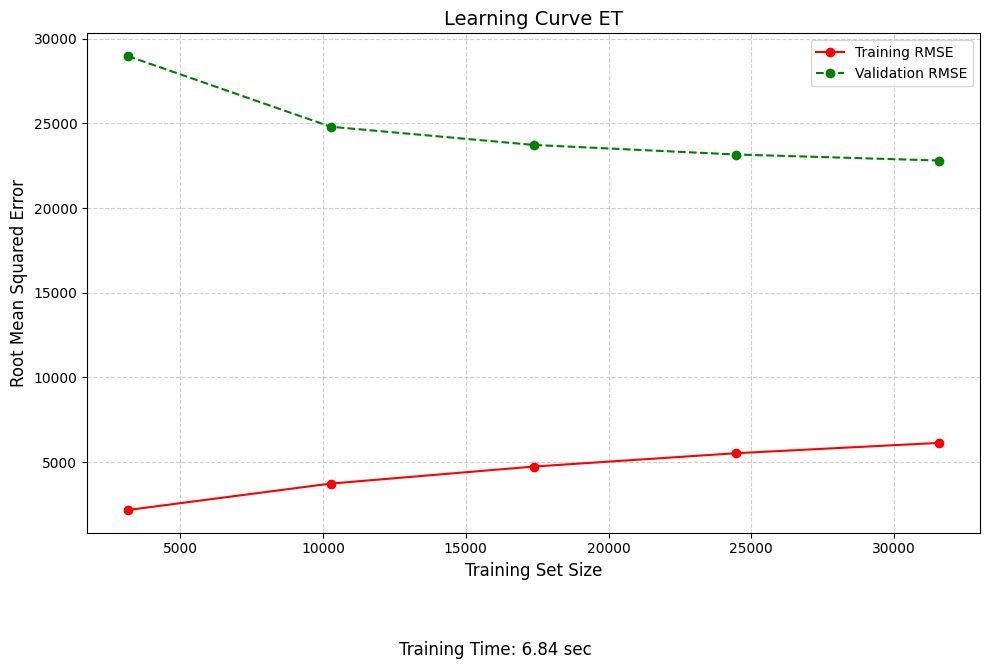

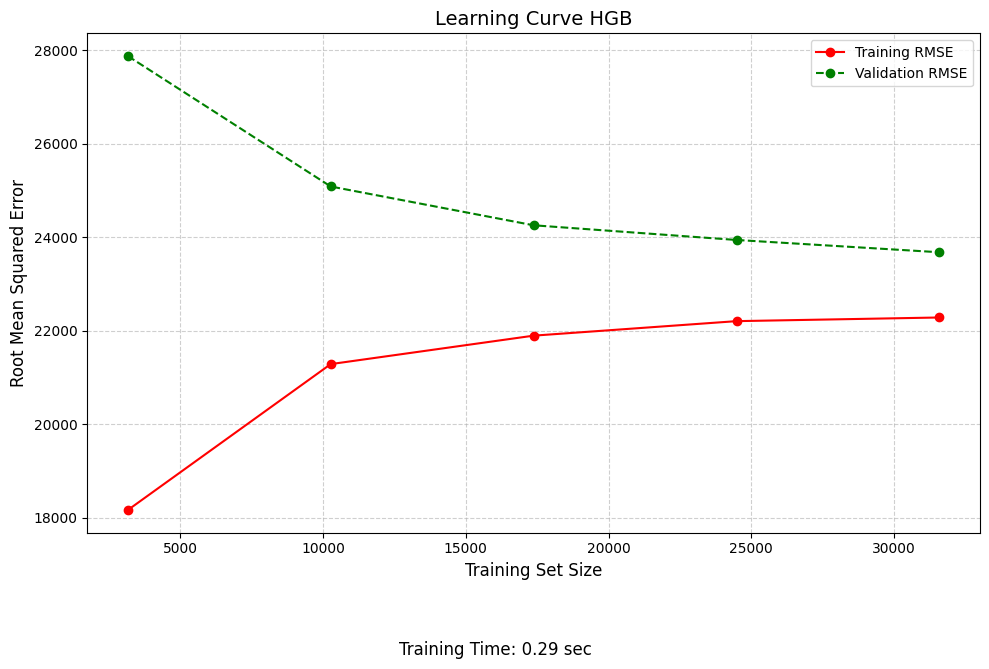

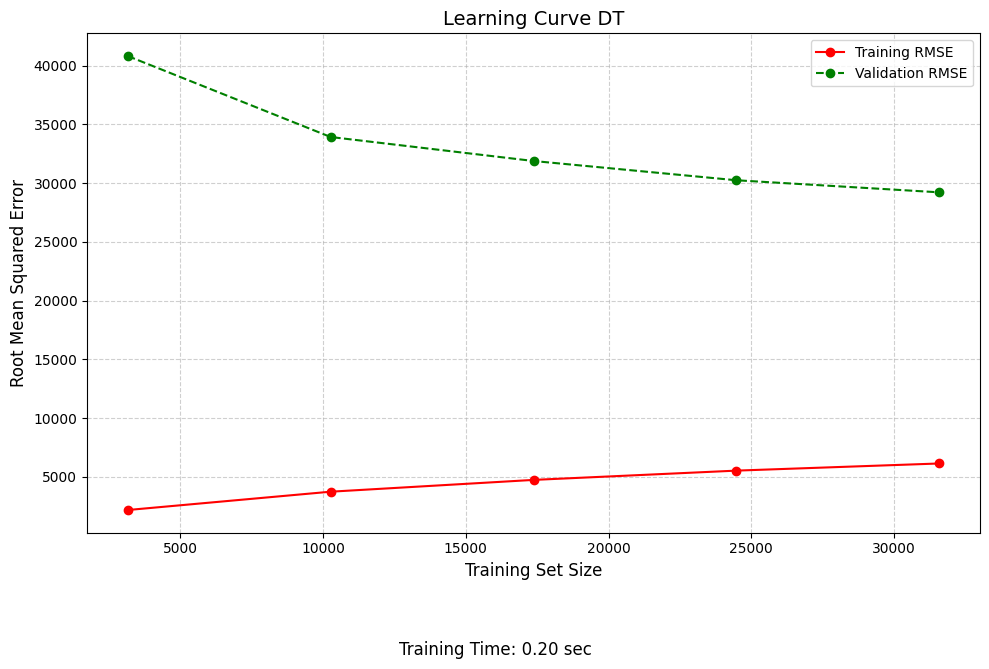

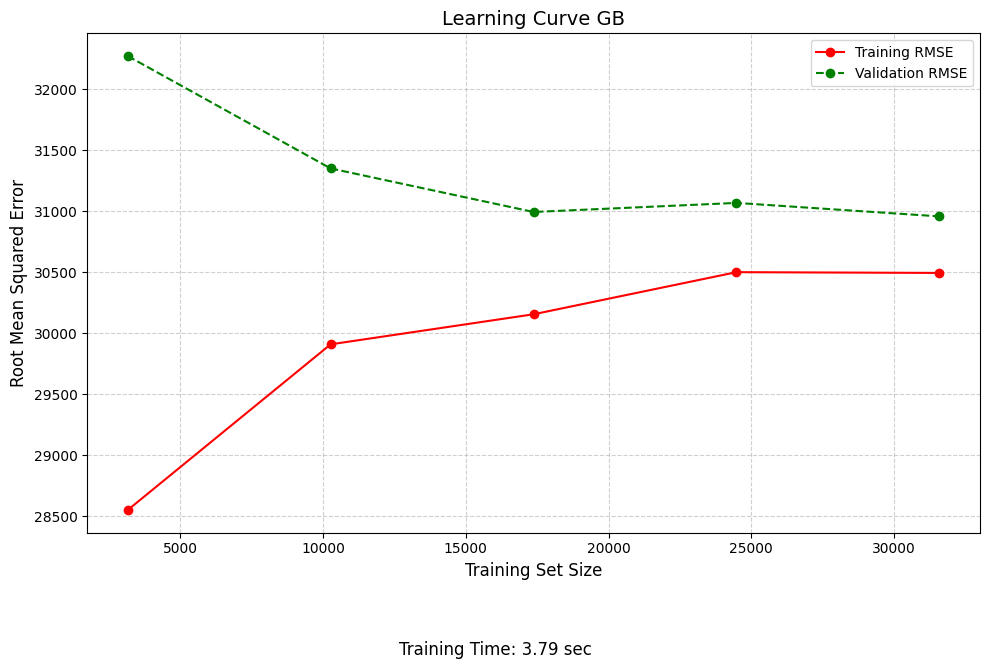

In [62]:
plot_regression_learning_curve(ExtraTreesRegressor(random_state=7), X_train, y_train, "Learning Curve ET")
plot_regression_learning_curve(HistGradientBoostingRegressor(random_state=7), X_train, y_train, "Learning Curve HGB")
plot_regression_learning_curve(DecisionTreeRegressor(random_state=7), X_train, y_train, "Learning Curve DT")
plot_regression_learning_curve(GradientBoostingRegressor(random_state=7), X_train, y_train, "Learning Curve GB")

After plotting and analysing the learning curves for all four models. HistGradientBoostingRegressor (HGB) and GradientBoostingRegressor (GB) were the best performers.

**Good Generalization & Performance**

Both the models show a small gap between training and validation RMSE, as the training size increases. This indicates that the models are generalizing well and are not overfitting or underfitting. The curves are quite stable and converging smoothly. When the models are further tuned, there will not be instability and will likely improve in performance.

**ExtraTreesRegressor (ET) & DecisionTreeRegressor (DT)**

As for ET and DT, though they showed good performance when analysed using performance metrics, the learning curve shows the models do not generalize well, and are not really suitable for hypertuning.

- ExtraTreesRegressor has a very low training RMSE and really high validation RMSE. This indicates the model is overfitting. 

- DecisionTreeRegressor similarly shows a large gap between training RMSE and validation RMSE, the model has poor generalization.

Therefore, out of the four models compared, HGB and GB are the chosen models to be hyper tuned to further improve the performance of the models using optimal parameters.

## **Hyperparamter Tuning and Evaluation**

The two models HistGradientBoostingRegressor and GradientBoostingRegressor will be tuned using RandomizedSearchCV with 5-fold cross-validation to identify the most optimal parameters based on negative mean squared error.

The models are evaluated based on key performance metrics such as MAE, MSE, RMSE and R2 Score. The training time for each tuning process is also recorded. Finally, the results are compiled as a DataFrame to provide a comparison on the performance of each model.

## **Hyperparamter Selection**

**HistGradientBoostingRegressor**

- `learning_rate`: This controls how much the model learns with each iteration. Low values ensure stable learning and high values allow for fast convergence. The values 0.01, 0.05 and 0.1 are chosen to balance both speed and accuracy.

- `max_depth`: This controls the depth of individual trees. It can be tuned to control the complexity of the model. The range chosen ensures the model learns the patterns well enough and ensure trees are not excessively deep, which help to reduce overfitting

- `min_samples_leaf`: Prevent the model from creating leaf nodes that are too specific.

- `max_iter`: This is used to choose the number of boosting iterations. The range chosen ensures the model has enough chances to learn the pattern but not risk overfitting.

**GradientBoostingRegressor**

- `learning_rate`: The same concept as above applies and the same values are chosen to balance both speed and accuracy.

- `n_estimators`: This is to choose the number of boosting stages. As it is similar to max_iter, the same set of values are used to find the best fit without overtraining reducing the chances of overfitting.

- `max_depth`: Helps to control the tree complexity to prevent overfitting.

- `min_samples_split` and `min_samples_leaf`: These parameters ensure useful splits and controlled tree sizes, which helps the model generalize better.

In [63]:
from sklearn.model_selection import RandomizedSearchCV
models = {
    'HistGradientBoostingRegressor': HistGradientBoostingRegressor(random_state=7),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=7),
}

# Define hyperparameter search space
param_grids = {
    'HistGradientBoostingRegressor': {
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [None, 10, 15, 20],
        'min_samples_leaf': [30, 50, 100],
        'max_iter': [100, 200, 300],
    },
    
    'GradientBoostingRegressor': {
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
}

# Perform hyperparameter tuning
best_estimators = {}
elapsed_times = {}

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    start_time = time.time()
    
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[model_name],
        n_iter=20,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        random_state=7
    )
    
    search.fit(X_train, y_train)
    elapsed = time.time() - start_time
    best_estimators[model_name] = search.best_estimator_
    elapsed_times[model_name] = elapsed
    
    print(f"Best parameters for {model_name}: {search.best_params_}")
    print(f"Best CV score for {model_name}: {search.best_score_:.4f}")
    print(f"Time elapsed for {model_name}: {elapsed:.2f} seconds\n")

# Evaluate tuned models
results = {}

for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2,
        'Time Elapsed (s)': elapsed_times[name]
    }

# Display results
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print("=" * 50)
print(results_df.round(4))

Tuning hyperparameters for HistGradientBoostingRegressor...
Best parameters for HistGradientBoostingRegressor: {'min_samples_leaf': 30, 'max_iter': 300, 'max_depth': 20, 'learning_rate': 0.1}
Best CV score for HistGradientBoostingRegressor: -451402278.3149
Time elapsed for HistGradientBoostingRegressor: 12.20 seconds

Tuning hyperparameters for GradientBoostingRegressor...
Best parameters for GradientBoostingRegressor: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best CV score for GradientBoostingRegressor: -483839798.9612
Time elapsed for GradientBoostingRegressor: 108.53 seconds

Model Performance Comparison:
                                      MAE           MSE        RMSE      R2  \
HistGradientBoostingRegressor  15707.0584  4.298889e+08  20733.7633  0.9574   
GradientBoostingRegressor      16425.1411  4.718531e+08  21722.1803  0.9533   

                               Time Elapsed (s)  
HistGradientBoostingRegressor  

**HistGradientBoostingRegressor**

*Before Tuning:*

`RMSE` - 22,938.29 	
    
`MAE` - 17,471.26 
    
`R2 Score` - 0.9479 	

`MSE` - 526,165,031
    
*After Tuning:*

`RMSE` - 20,733.76 
    
`MAE` - 15,707.06 
    
`R2 Score` - 0.9574 

`MSE` - 429,888,900


 **GradientBoostingRegressor**

*Before Tuning:*

`RMSE` - 30,939.05		
    
`MAE` - 23,178.97
    
`R2 Score` - 0.9052	

`MSE` - 957,224,700
    
*After Tuning:*

`RMSE` - 21, 722.18
    
`MAE` - 16,425.14
    
`R2 Score` - 0.9533

`MSE` - 471,853,100

**Conclusion**

The hyperparamter tuning helped the models improve in performance, as they key performance metrics after the training saw improvements. GradientBoostingRegressor had the greatest improvement in performance. However, comparing both HGB and GB, HGB peformed better than GB in all key metrics. 



## **Tuned Models Learning Curve Analysis**

The learning curves for the models were plotted again after hyperparamter tuning to further analyse the performance of the models before making the final selection.

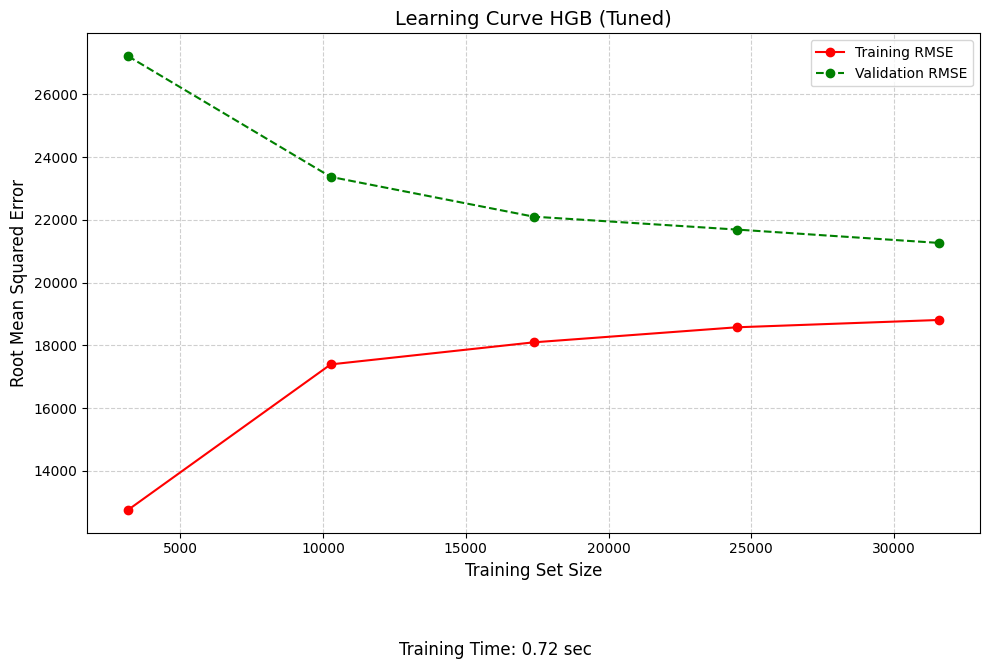

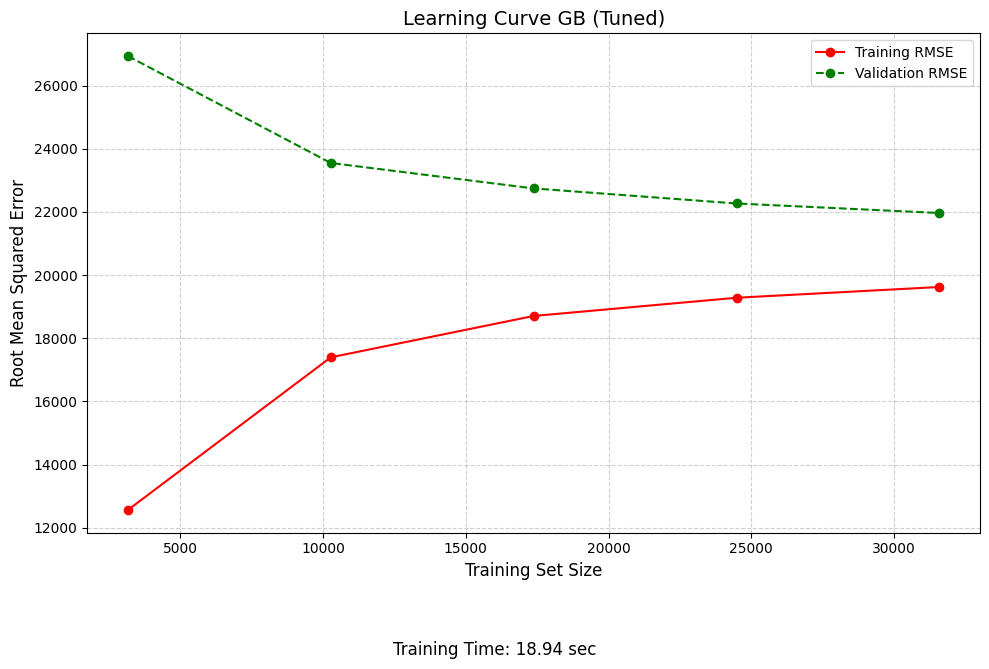

In [64]:
plot_regression_learning_curve(best_estimators['HistGradientBoostingRegressor'], X_train, y_train, "Learning Curve HGB (Tuned)")
plot_regression_learning_curve(best_estimators['GradientBoostingRegressor'], X_train, y_train, "Learning Curve GB (Tuned)")

**HistGradientBoostingRegressor (HGB)** 

- The validation RMSE decreases steadily and is closely tracking the training RMSE. This indicates the model is generalizing well.

**GradientBoostingRegressor (GB)**

- The validation RMSE is slightly higher than the training RMSE. However, the gap is narrowing as it converges and the model has better stability compared to the un-tuned model.

**Conclusion**

HGB had a faster training time compared to GB. Therefore the HGB is not only accurate but also more efficient.

Overall, both curves show the models performing well with them learning underlying patterns well. 

## **HistGradientBoosting Justification**

A total of 12 different regression models were trained and evaluated using RMSE, MAE, MSE and R2 Score. The top four models ExtraTreesRegressor (ET), HistGradientBoostingRegressor (HGB), DecisionTreeRegressor (DT) and GradientBoostingRegressor (GB) were further cross-validated with learning curves plotted. 

From that the two best performers, HGB and GB were hypertuned using RandomizedSearchCV and learning curves were re-plotted. Overall, HistGradientBoostingRegressor consistently performed the best among all the other models. It consistently had a low Mean Absolute Error, Root Mean Squared Error and Mean Squared Error while having a high R2 Score.

- This indicates the model is both accurate and robust
- HGB is well optimized for large tabular datasets and it was able to outperform models like DT and linear regression models by capturing complex, non-linear patterns. 

- While ET performed better than HGB at the start, learning curve analysis showed that the model was overfitting and not generalizing well. The learning curve of HGB was the best among all four models where it generalized well and did not overfit.

- Compared to GB, HGB performed better both before and after hyperparameter tuning. 

- HGB also had faster training time than GB as it used histogram-based optimization.

**Summary**

The peformance of the model will be further visualised and analysed to conclude the findings. SHAP values will be used to get insights into feature importance and contribution of features in predicting resale price.

## **Best Model Visualisations**

The best model HGB is further analysed using, actual vs predicted scatter plot, residual plot, histograms for residuals and errors distribution. This will help conclude the performance of the model.

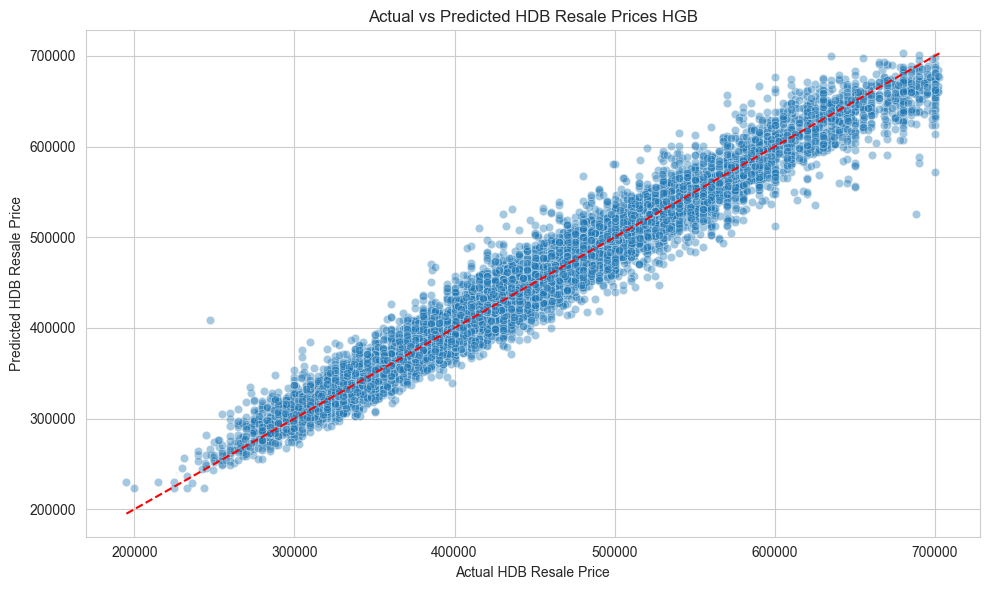

In [65]:
# Get the best model for prediction
hgb_best_model = best_estimators['HistGradientBoostingRegressor']

# Predict resale prices using the best model
y_pred = hgb_best_model.predict(X_test)

# Plot actual vs predicted resale prices
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(x=y_test, y=y_pred, alpha=0.4)
plt.xlabel('Actual HDB Resale Price')
plt.ylabel('Predicted HDB Resale Price')
plt.title('Actual vs Predicted HDB Resale Prices HGB')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

This scatter plot compares the actual HDB resale prices and the prices predicted by the tuned HistGradientBoosting Model. From the scatter plot we can see that the dots are closely aligned with the red line. This indicates a high accuracy in predictions by the model. Most of the predicted values are close to the actual values, showing that the model is able to generalize well over a wide range of resale prices. However, at the higher resale prices there is abit of heteroscedasticity. 

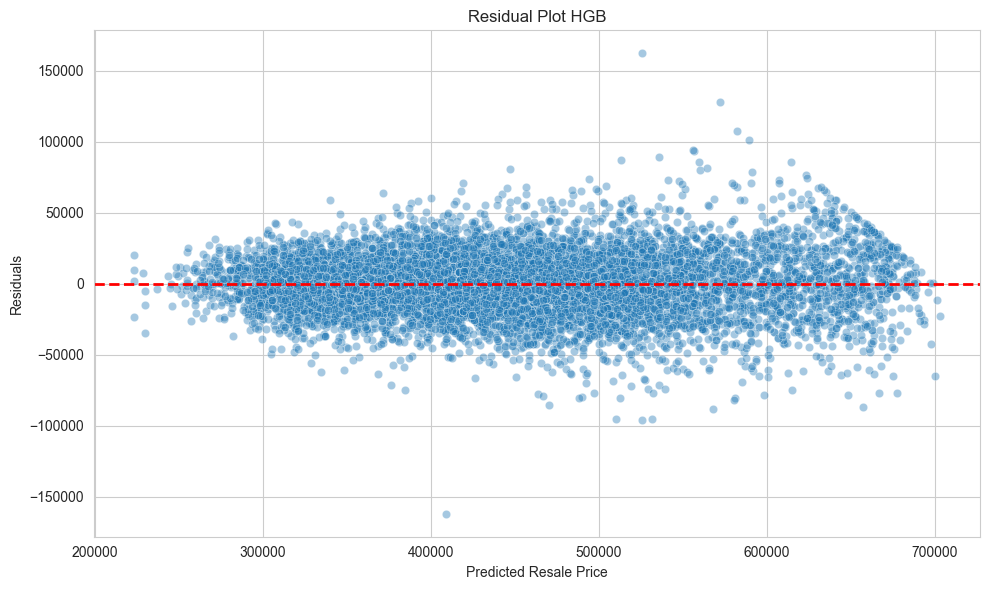

In [66]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Resale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot HGB')
plt.grid(True)
plt.tight_layout()
plt.show()

The residual plot is used to visualise the difference between actual and predicted HDB resale prices. The residuals are randomly scattered aroud zero, this suggests the model is making unbiased predictions. The distribution is consistent. However, there is a funnel shaped pattern observable at the higher predicted resale prices which suggests slight heteroscedasticity. This suggests prediction errors increase slighly towards higher resale prices. Overall, there is no major pattern to be observed suggesting a good model performance.

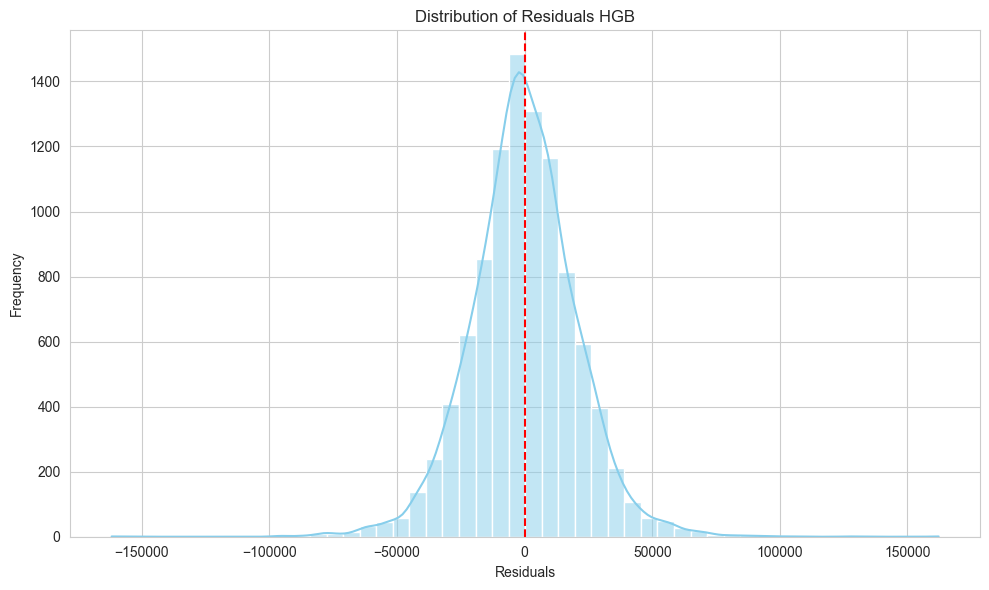

In [67]:
# Plot the distribution of residuals
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.title("Distribution of Residuals HGB")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.axvline(0, color='red', linestyle='--')
plt.tight_layout()
plt.show()



The histogram shows the residuals are normally distributed and centered around zero. 

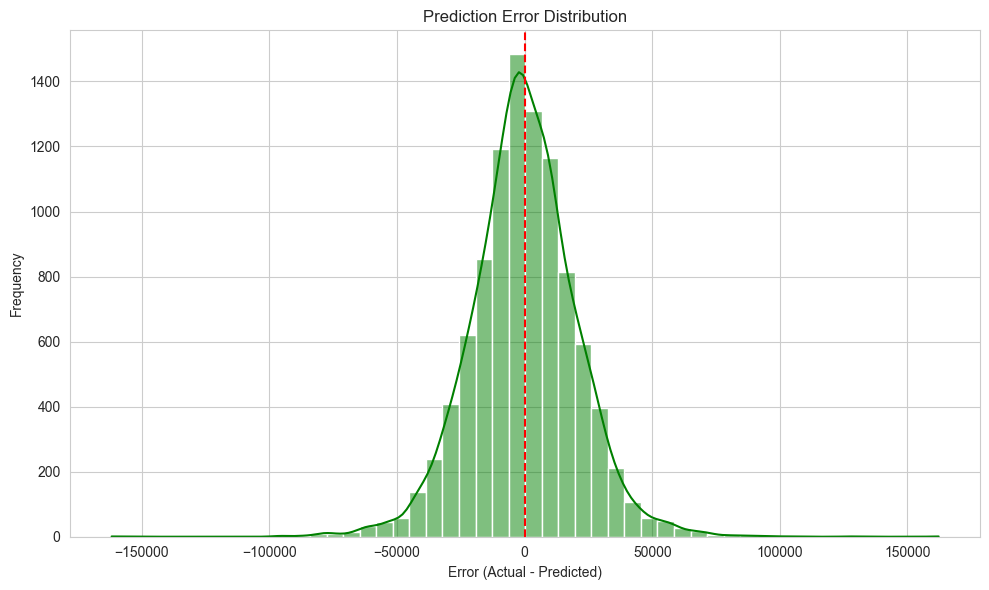

In [68]:
# Plot the distribution of prediction errors
errors = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=50, kde=True, color='green')
plt.axvline(0, color='red', linestyle='--')
plt.title('Prediction Error Distribution')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


The prediction error distribution is normally distributed. This suggests the model can make predictions that are unbiased. Therfore, there is no major overprediction or underprediction. 

In [69]:
# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Create DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["MAE", "MSE", "RMSE", "R² Score"],
    "Value": [mae, mse, rmse, r2]
})

# Format values
metrics_df["Value"] = metrics_df["Value"].apply(lambda x: f"{x:,.4f}" if isinstance(x, float) else x)

# Display the error metrics of the best model
from IPython.display import display
display(metrics_df)


,Metric,Value
0,MAE,"15,707.0584"
1,MSE,"429,888,938.5757"
2,RMSE,"20,733.7633"
3,R² Score,0.9574


## **SHAP Analysis**

SHAP (SHapley Additive exPlanations) helps us analyse and explain how each of the features contributed to the model's predictions. This makes the predictions of the model more transparent, trustworthy and interpretable.

In [70]:
import shap

# Create SHAP Explainer
explainer = shap.TreeExplainer(hgb_best_model)

# Prepare Sample
sample_size = min(1000, len(X_test))
X_sample = X_test.sample(n=sample_size, random_state=42)
y_sample = y_test.loc[X_sample.index] if hasattr(y_test, 'loc') else y_test[X_sample.index]

# Calculate SHAP Values
shap_values = explainer.shap_values(X_sample)

c:\Users\amirt\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


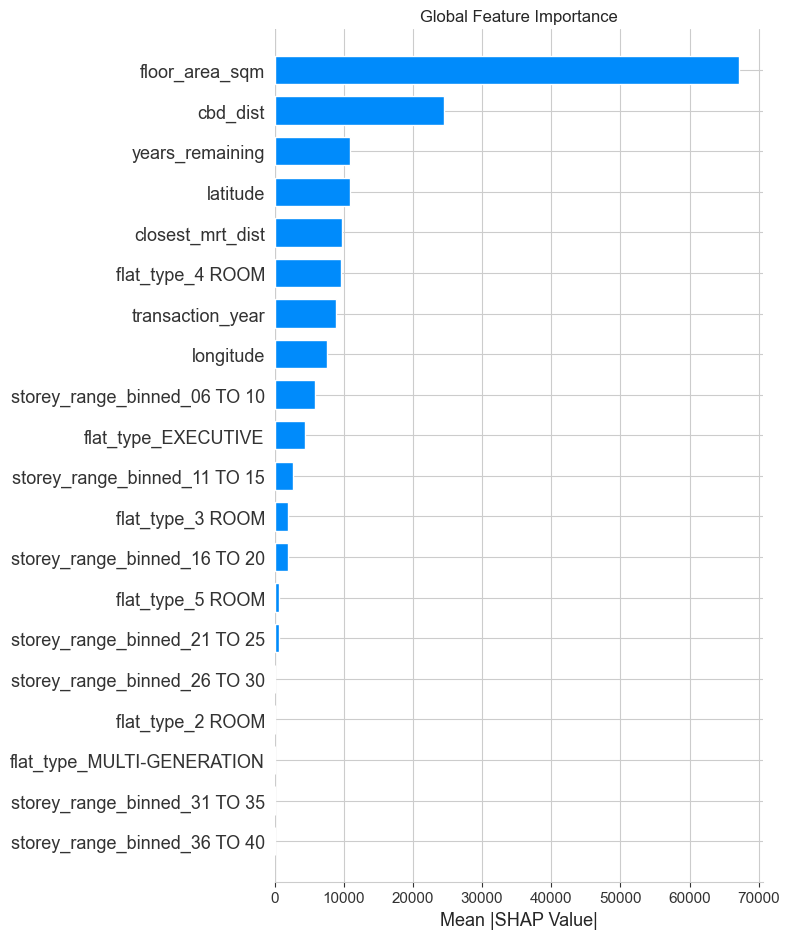

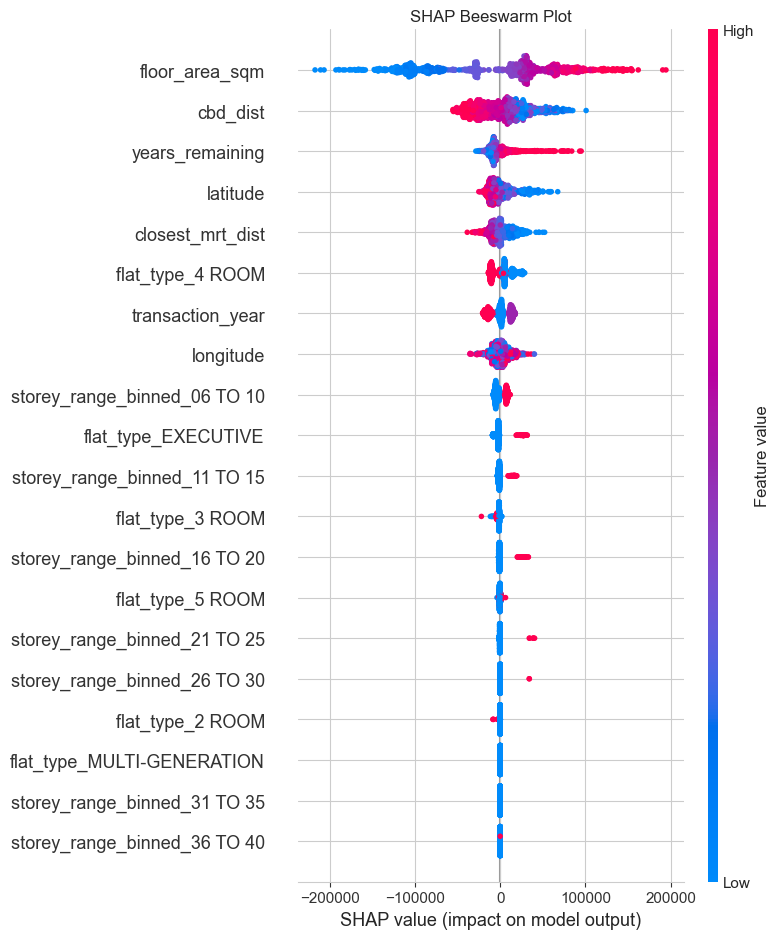

In [71]:
# Feature Importance Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.title("Global Feature Importance")
plt.xlabel("Mean |SHAP Value|")
plt.tight_layout()
plt.show()

# Global Feature Impact Beeswarm
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_sample, show=False)
plt.title("SHAP Beeswarm Plot")
plt.tight_layout()
plt.show()



The SHAP Global feature importance plot and beeswarm plot show that floor area sqm has the highest influence on the predicted resale price. This is followed by cbd_dist, years_remaining and latitude. The higher the floor area the higher the resale price. Furthermore, shorter distances to CBD and MRT contribute to higher resale prices. 

In [72]:
# Calculate top feature importance
feature_importance = np.abs(shap_values).mean(0)
feature_names = X_sample.columns if hasattr(X_sample, 'columns') else [f'Feature_{i}' for i in range(X_sample.shape[1])]

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Average_Impact': feature_importance
}).sort_values('Average_Impact', ascending=False)

# Display top 10
display(importance_df.head(10))


,Feature,Average_Impact
4,floor_area_sqm,67203.149556
3,cbd_dist,24497.389516
5,years_remaining,10921.457016
0,latitude,10838.646243
2,closest_mrt_dist,9790.056108
9,flat_type_4 ROOM,9641.452119
6,transaction_year,8828.301692
1,longitude,7599.176633
13,storey_range_binned_06 TO 10,5860.749578
11,flat_type_EXECUTIVE,4410.325426


The SHAP average impact values further reinforce the findings from the global feature importance bar chart and beeswarm plot. From the table we can observe floor_area_sqm had the largest average impact at approximately (67203), followed by cbd_dist (24497), years_remaining (10921), latitude (10838) and closest_mrt_dist (9790).

In [73]:
predictions = hgb_best_model.predict(X_sample)
top_3_features = importance_df.head(3)

print("Top 3 Features Impact Summary:")
print("-" * 40)
for i, row in top_3_features.iterrows():
    fname = row['Feature']
    fidx = list(feature_names).index(fname)

    values = shap_values[:, fidx]
    pos = np.mean(values[values > 0]) if np.any(values > 0) else 0
    neg = np.mean(values[values < 0]) if np.any(values < 0) else 0

    print(f"{fname:<30}: +${pos:,.0f} | -${neg:,.0f}")
print()

# Compute SHAP sum vs model prediction correlation
shap_sum = np.sum(shap_values, axis=1) + (
    explainer.expected_value[0] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
)
model_pred = predictions
correlation = np.corrcoef(shap_sum, model_pred)[0, 1]

# Display model-level SHAP metrics
base_value = explainer.expected_value[0] if isinstance(explainer.expected_value, np.ndarray) else explainer.expected_value
price_range = (predictions.min(), predictions.max())
total_features = len(feature_names)
sample_size = len(X_sample)
above_avg = len(importance_df[importance_df['Average_Impact'] > importance_df['Average_Impact'].mean()])

print("SHAP Summary:")
print("-" * 40)
print(f"SHAP Explanation Accuracy : {correlation:.4f}")
print(f"Base Value                : ${base_value:,.0f}")
print(f"Predicted Price Range     : ${price_range[0]:,.0f} - ${price_range[1]:,.0f}")
print(f"Total Features Analyzed   : {total_features}")
print(f"SHAP Sample Size          : {sample_size}")
print(f"Above-average Features    : {above_avg}/{total_features}")


Top 3 Features Impact Summary:
----------------------------------------
floor_area_sqm                : +$53,398 | -$-88,795
cbd_dist                      : +$24,776 | -$-24,178
years_remaining               : +$15,388 | -$-8,691

SHAP Summary:
----------------------------------------
SHAP Explanation Accuracy : 1.0000
Base Value                : $444,395
Predicted Price Range     : $228,440 - $695,784
Total Features Analyzed   : 20
SHAP Sample Size          : 1000
Above-average Features    : 7/20


The SHAP feature impact summary shows floor_area_sqm, cbd_dist and years_remaining as the top 3 most impactful features. For floor area the average postive contribution to resale price was +$53,398 while the negative impact was -$88,795. The explanation accuracy was 1.0000, which indicates strong alignment between SHAP values and the prediction of model. Out of the 20 features, 7 features proved to have above average impact on resale price prediction.

In [74]:
# Display the numerical columns range for the website
numerical_columns = ['latitude', 'longitude', 'closest_mrt_dist', 'cbd_dist','floor_area_sqm', 'years_remaining', 'transaction_year']

for col in numerical_columns:
    print(f"{col}: min = {X[col].min():.2f}, max = {X[col].max():.2f}, mean = {X[col].mean():.2f}")

latitude: min = 1.27, max = 1.46, mean = 1.37
longitude: min = 103.69, max = 103.99, mean = 103.84
closest_mrt_dist: min = 31.76, max = 3496.40, mean = 763.94
cbd_dist: min = 592.12, max = 20225.10, mean = 12667.79
floor_area_sqm: min = 31.00, max = 189.00, mean = 94.73
years_remaining: min = 52.00, max = 98.00, mean = 75.35
transaction_year: min = 2012.00, max = 2014.00, mean = 2012.92


## **Conclusion**

The post-model visualisations further support good performance of the model on predicting HDB resale price.

Therefore, considering the high accuracy of predictions, efficiency, scalability and interpretability. HGB is the most justified and reliable model to be deployed to predict HDB resale price.

In [75]:
import joblib

# Save the best model to a file
joblib.dump(hgb_best_model, 'hdb_resale_price_hgb.pkl')
joblib.dump(explainer, "shap_explainer.pkl")
joblib.dump(X_sample, "X_sample.pkl")

print("Model and SHAP explainer saved successfully.")

Model and SHAP explainer saved successfully.


## **Appendix**

This section is to show other methods taken which did not prove useful.

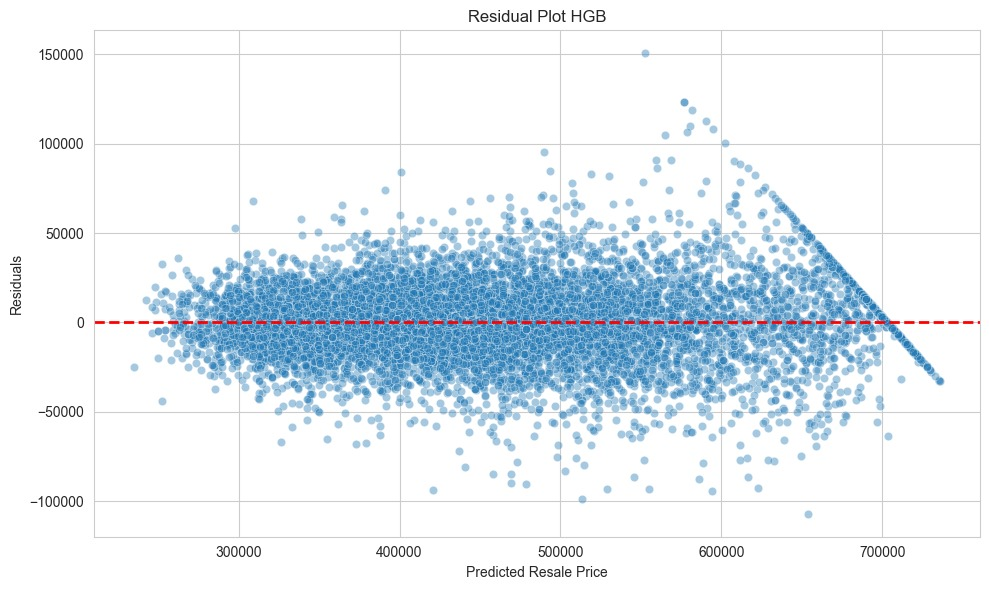

The above scatter plot shows the residual plot when the outliers in resale price were capped. The top 5% of the resale prices were capped at the 95th percentile. 

- The residual scatter plot shows a downward pattern around 700,000. This indicates there is underprediction for flats above the 95th percentile

- The model does not learn and fails to generalize for higher-priced flats.

Therefore, to maintain data integrity, filtering out the top 5% was chosen instead of capping. 

- This helped to preserve the distribution of the reamaining dataset

- Helped to reduce the skew 

- Allowed the model to learn from true values without introducing artificial bias.